# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

## Specifying filetype, and folder as before

In [2]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [3]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [4]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

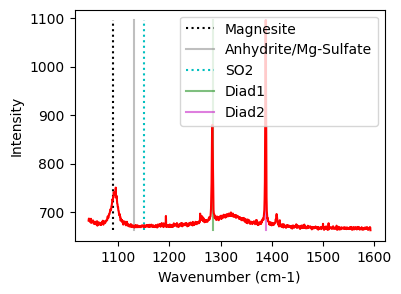

In [5]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [6]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [7]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=206.45624868575658, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1283.771649       1283.771649         0.01708        630.007096   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           1.179249                  0             204.259176   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        2.458578        0.577151    2.358498  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.083458      1.051118                   0.196834   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.011547  PseudoVoigtModel

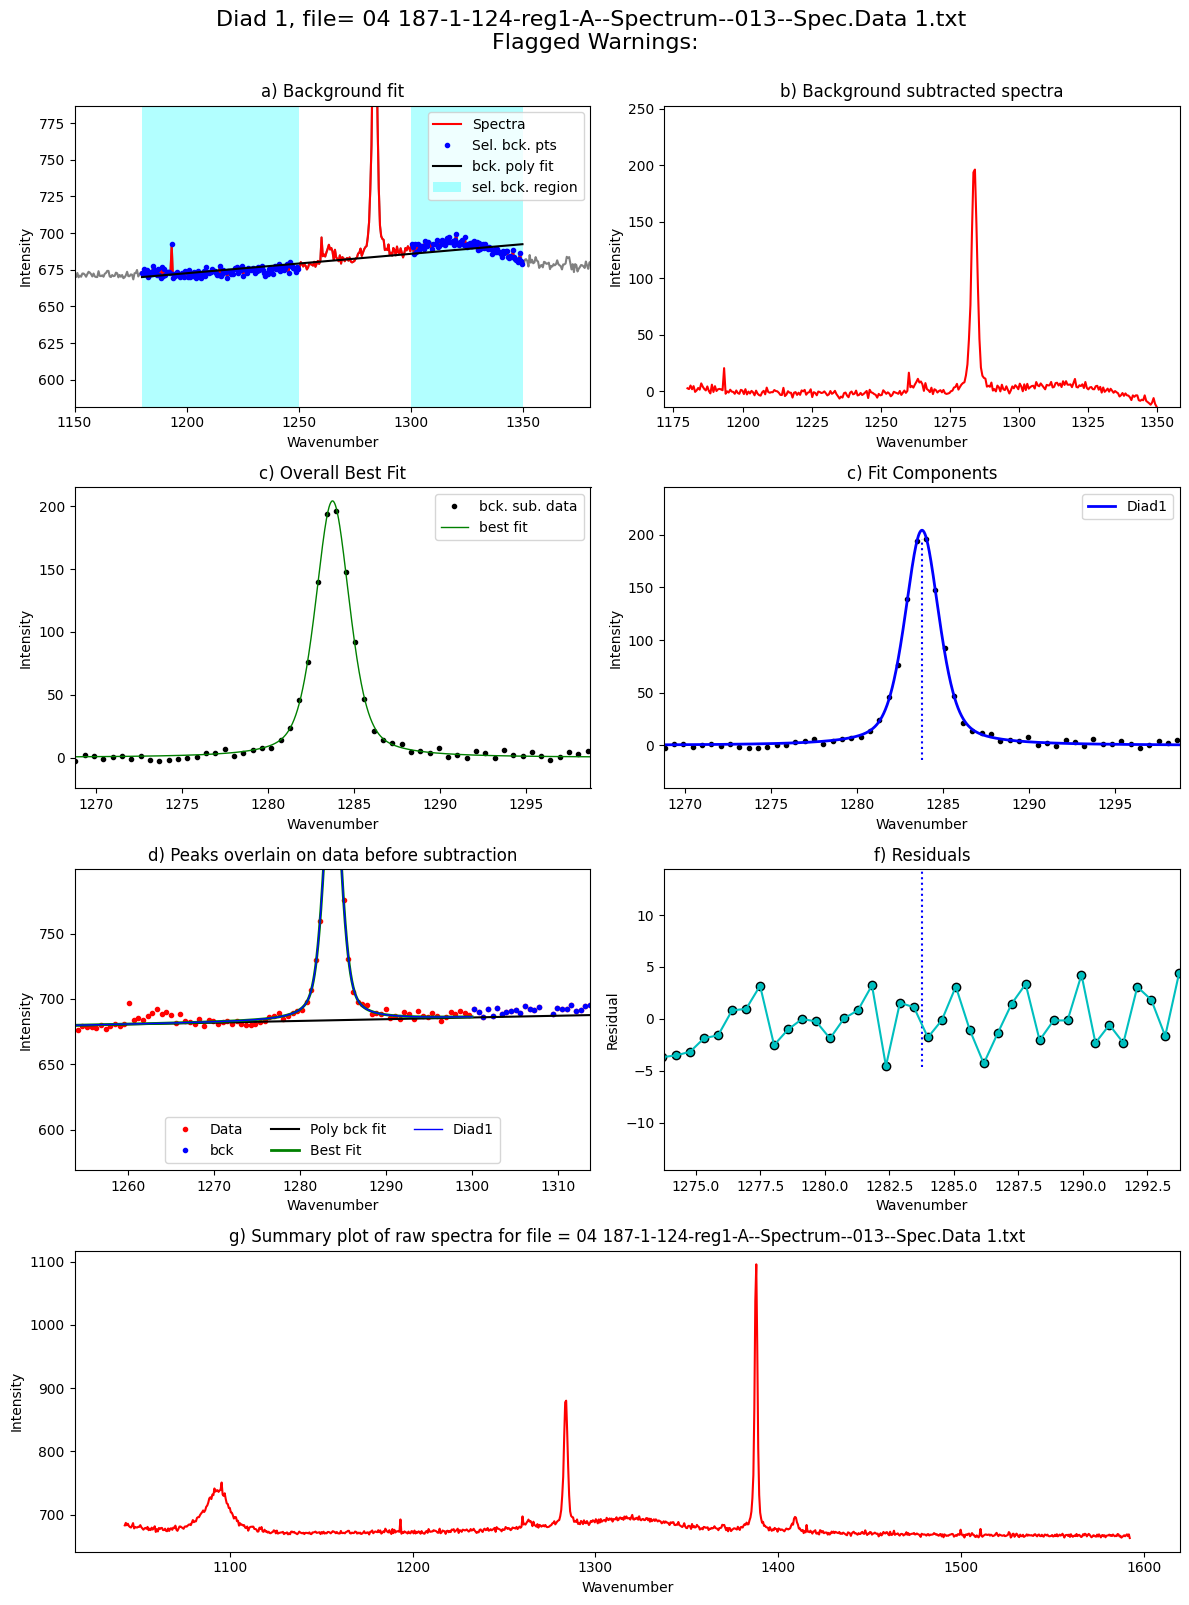

In [8]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [9]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [10]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=421.6972541156738, HB_prom=nan, C13_prom=10, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.909125       1387.909125        0.006228       1002.822994   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.866406                  0             431.621253   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  \
0        3.192159        0.639409    1.732812  Flagged Warnings:   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.023483      1.039244                   0.040692   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0              0.004015  PseudoVoigtModel

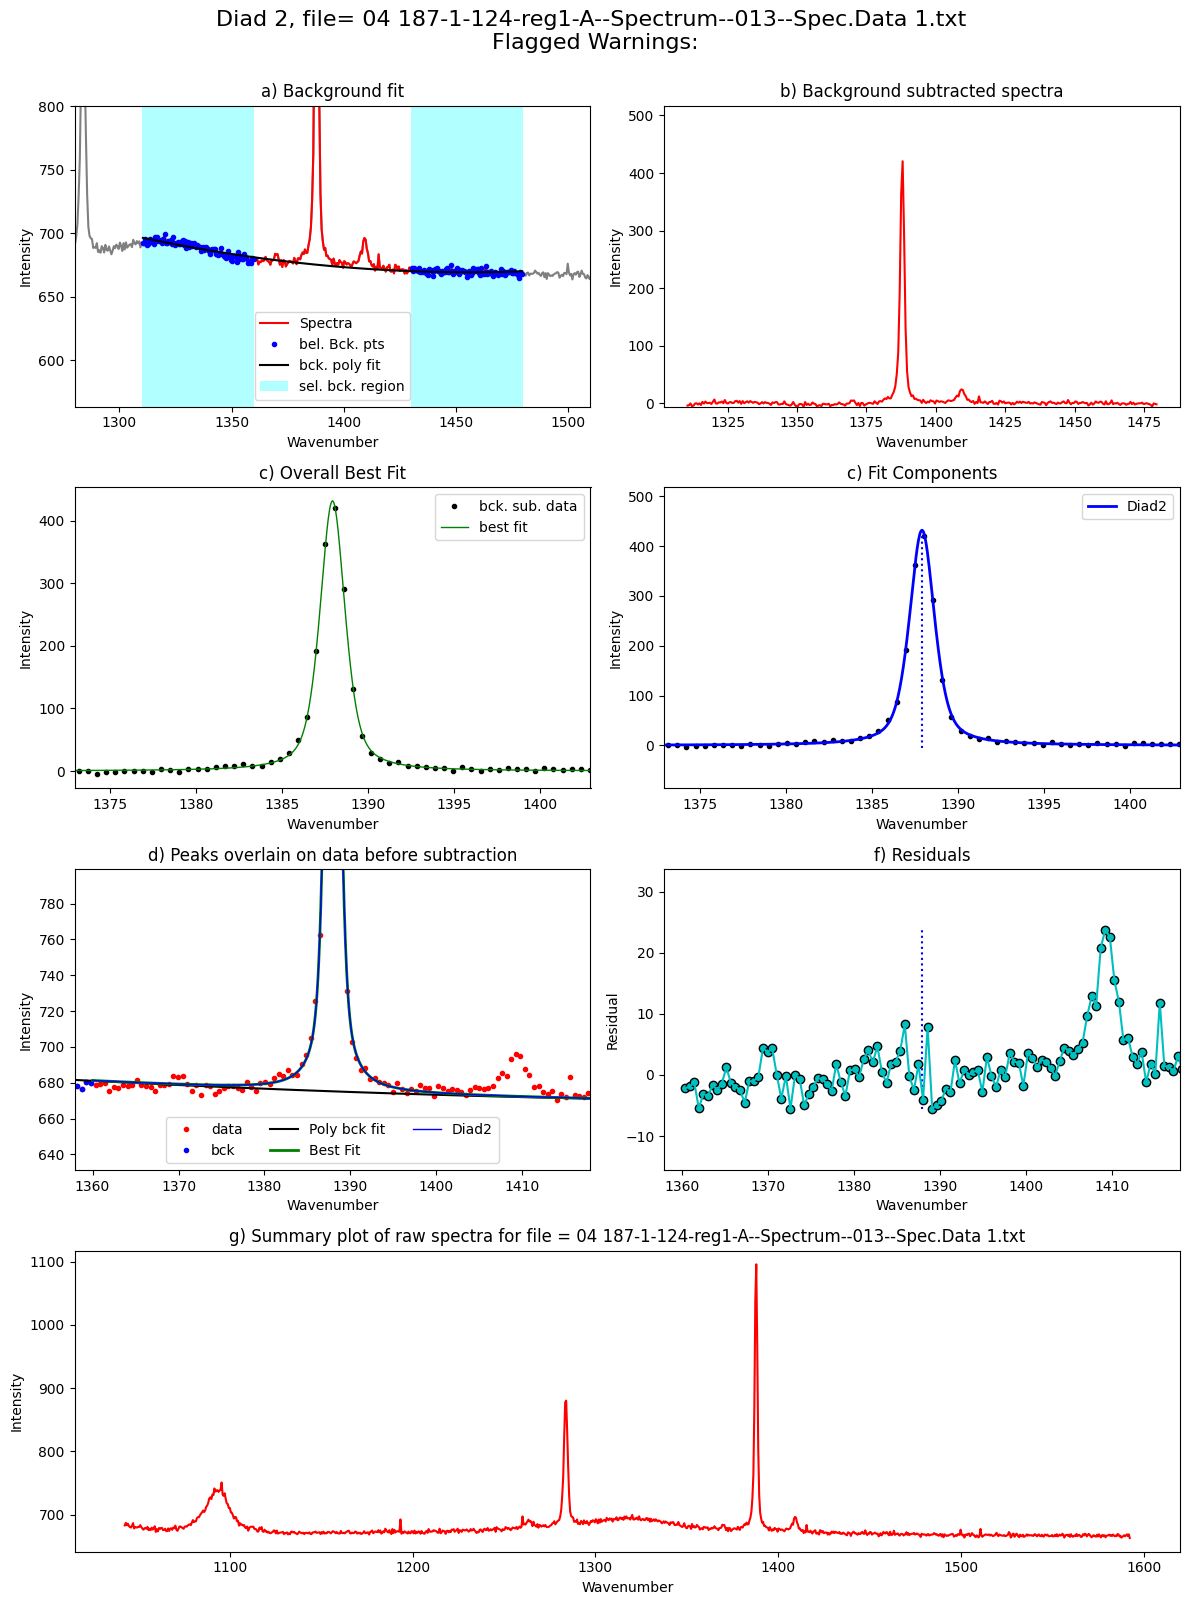

In [11]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/14 [00:00<?, ?it/s]

Processing file: 04 187-1-124-reg1-A--Spectrum--013--Spec.Data 1.txt


  7%|▋         | 1/14 [00:01<00:24,  1.87s/it]

Processing file: 05 187-1-124-reg1-B--Spectrum--015--Spec.Data 1.txt


 14%|█▍        | 2/14 [00:03<00:23,  1.98s/it]

Processing file: 06 187-1-124-reg1-C--Spectrum--019--Spec.Data 1.txt


 21%|██▏       | 3/14 [00:05<00:21,  1.92s/it]

Processing file: 07 187-1-124-reg1-D--Spectrum--021--Spec.Data 1.txt


 29%|██▊       | 4/14 [00:07<00:19,  1.98s/it]

Processing file: 09 187-1-124-reg1-E--Spectrum--025--Spec.Data 1.txt


 36%|███▌      | 5/14 [00:09<00:17,  1.97s/it]

Processing file: 10 187-1-124-reg1-E--Spectrum--026--Spec.Data 1.txt


 43%|████▎     | 6/14 [00:11<00:15,  1.90s/it]

Processing file: 11 187-1-124-reg1-F--Spectrum--028--Spec.Data 1.txt


 50%|█████     | 7/14 [00:13<00:13,  1.95s/it]

Processing file: 12 187-1-124-reg1-G--Spectrum--030--Spec.Data 1_CRR_DiadFit.txt


 57%|█████▋    | 8/14 [00:15<00:12,  2.00s/it]

Processing file: 13 187-1-124-reg1-H--Spectrum--032--Spec.Data 1.txt


 64%|██████▍   | 9/14 [00:17<00:10,  2.03s/it]

Processing file: 14 187-1-124-reg1-H--Spectrum--033--Spec.Data 1_CRR_DiadFit.txt


 71%|███████▏  | 10/14 [00:20<00:08,  2.10s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:3104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 16 187-1-124-reg2-A--Spectrum--036--Spec.Data 1.txt


 79%|███████▊  | 11/14 [00:21<00:06,  2.01s/it]

Processing file: 17 187-1-124-reg2-B--Spectrum--038--Spec.Data 1_CRR_DiadFit.txt


 86%|████████▌ | 12/14 [00:23<00:03,  1.94s/it]

Processing file: 18 187-1-124-reg2-C--Spectrum--040--Spec.Data 1.txt


 93%|█████████▎| 13/14 [00:25<00:01,  1.93s/it]

Processing file: 21 FO-1--Spectrum--045--Spec.Data 1.txt


100%|██████████| 14/14 [00:27<00:00,  1.97s/it]


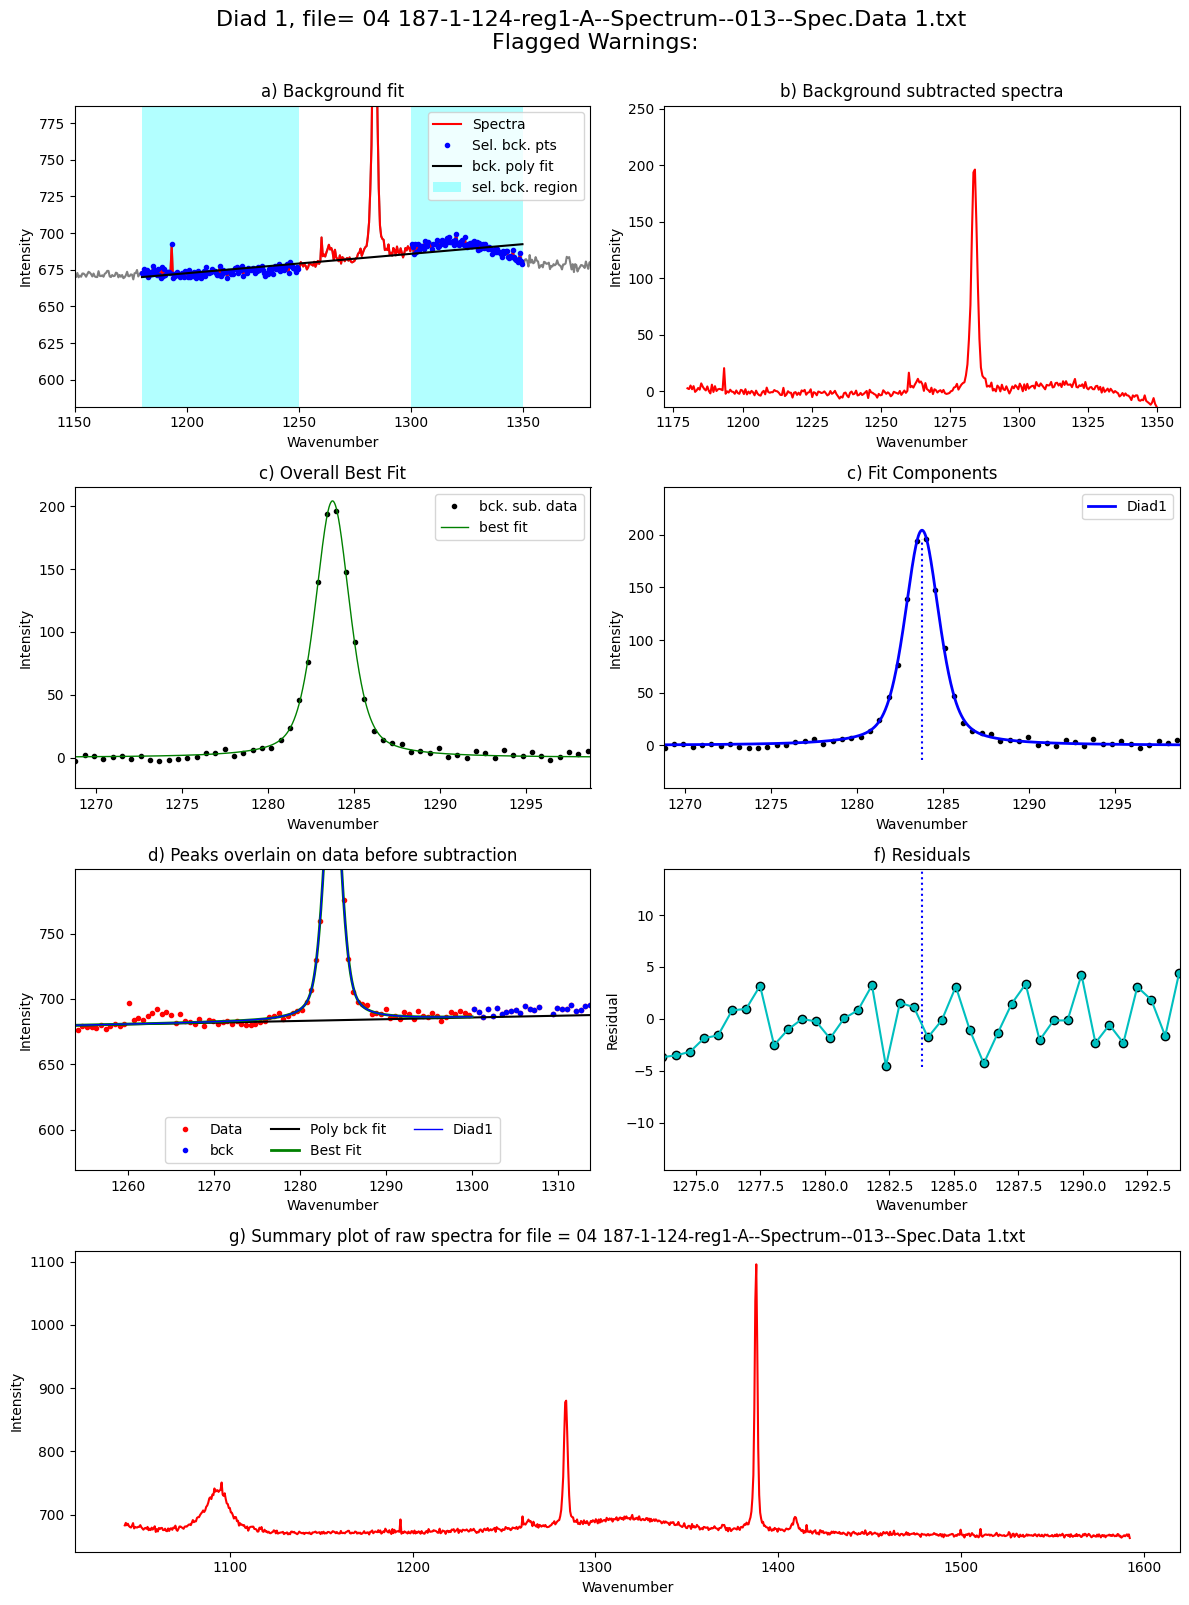

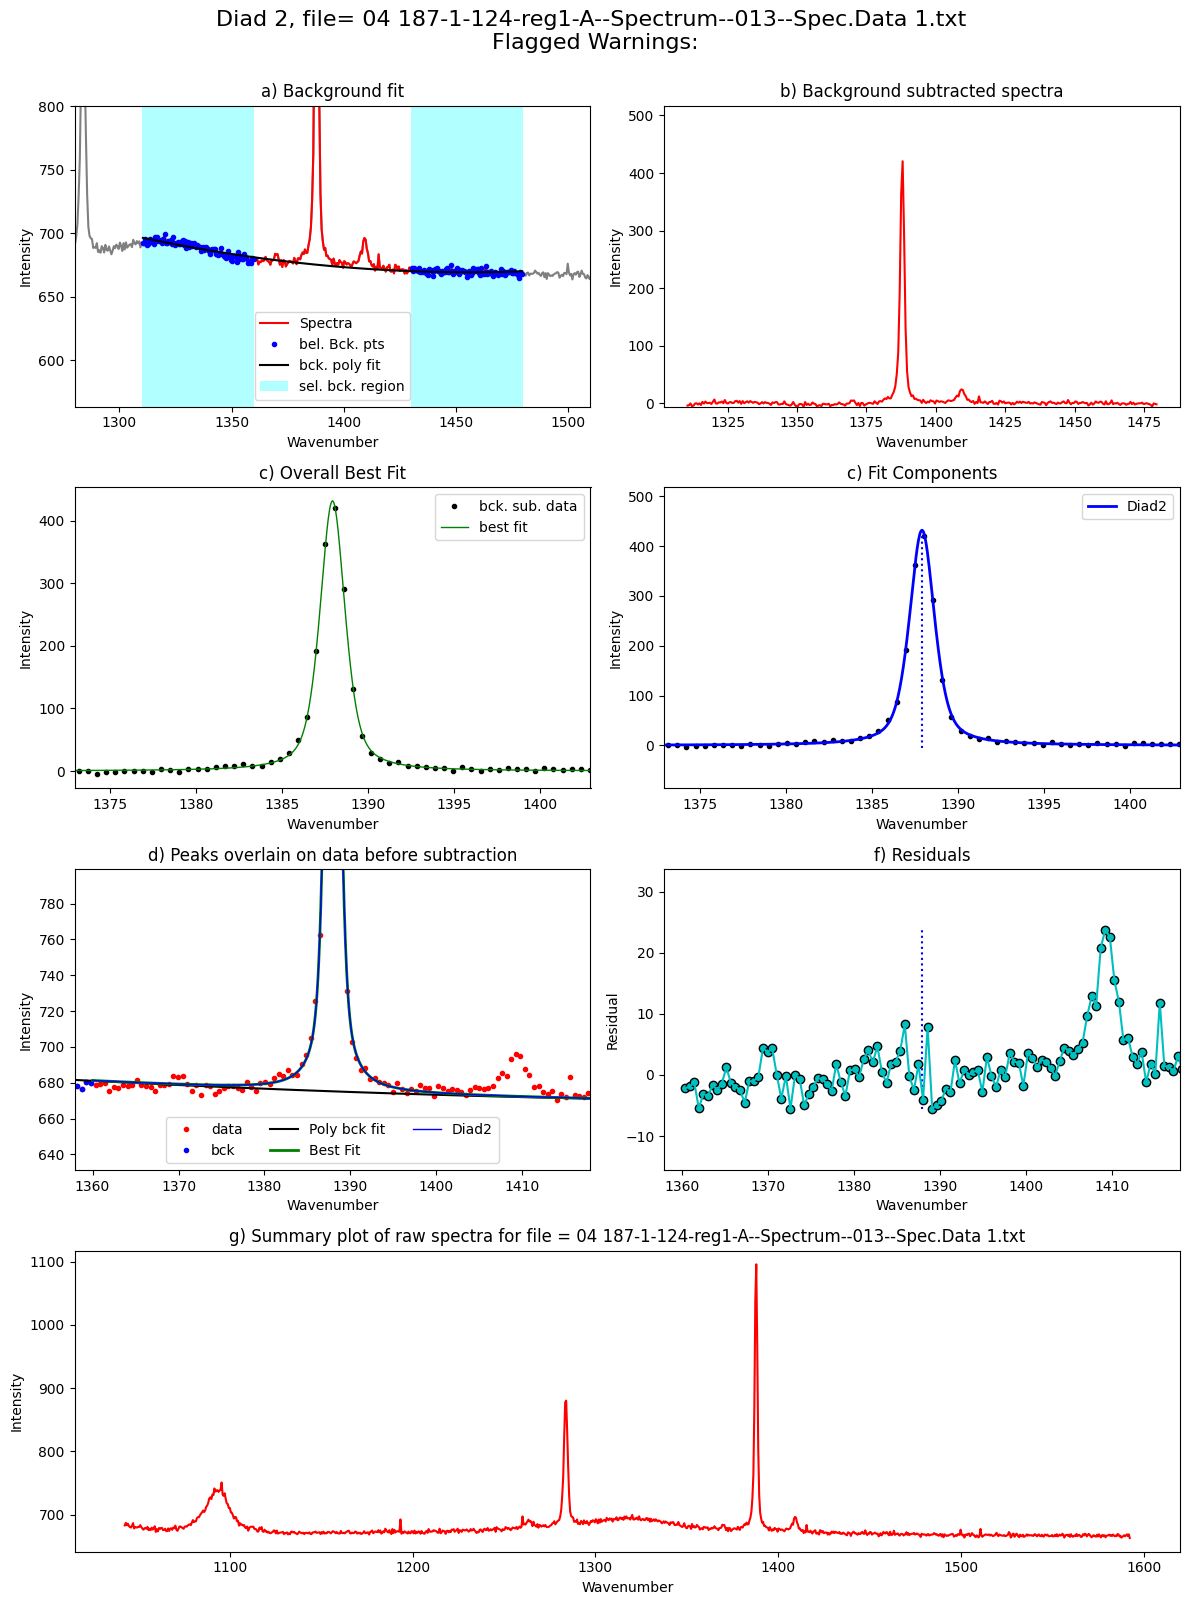

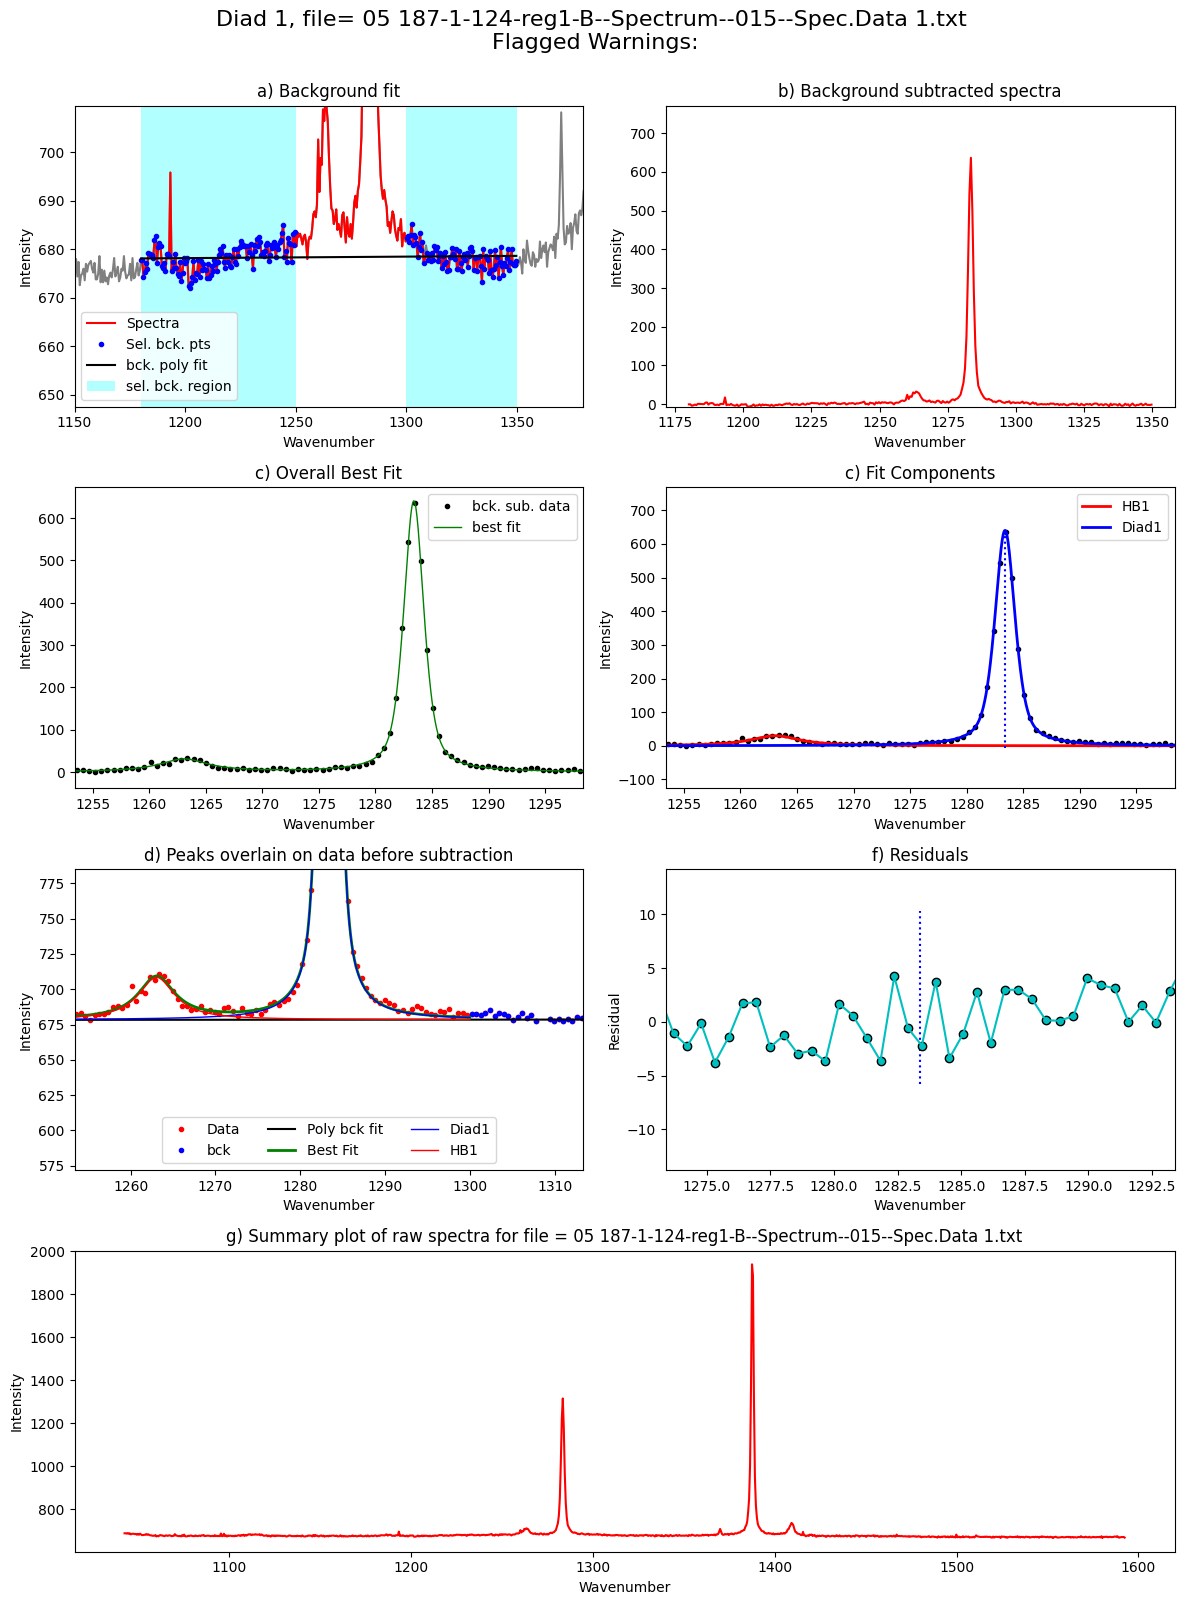

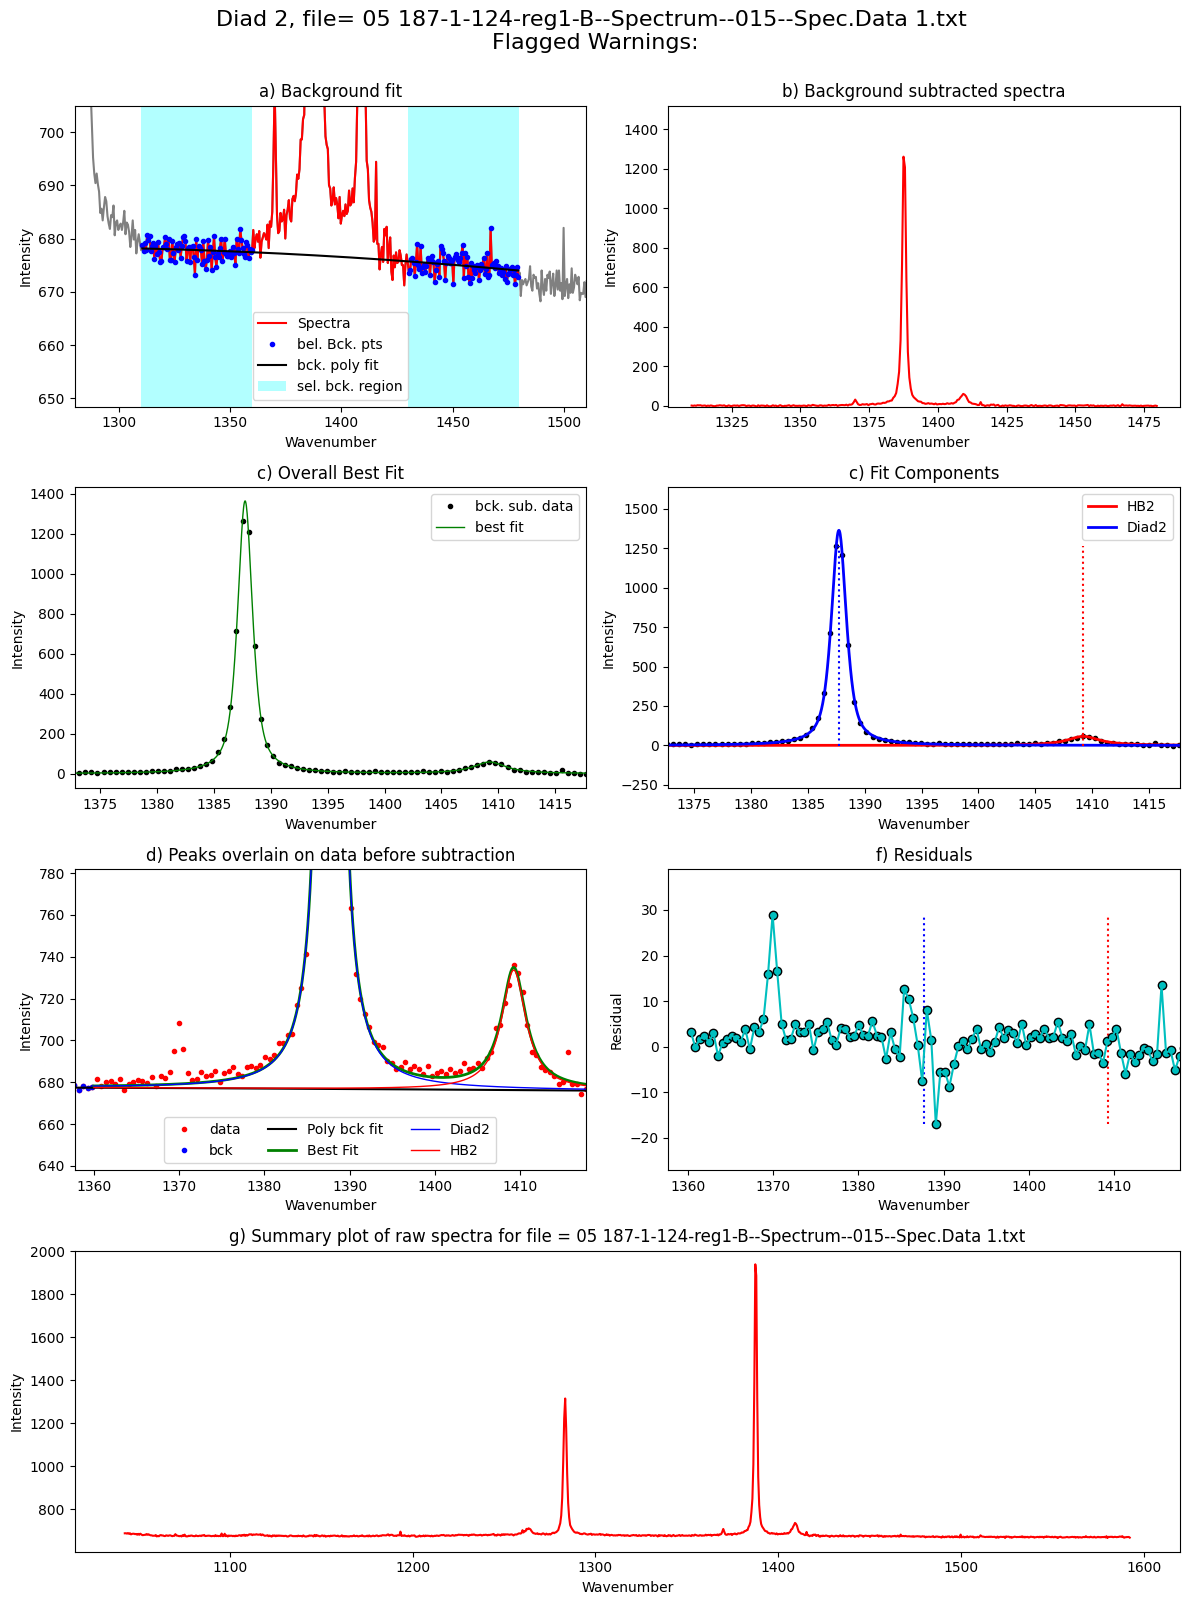

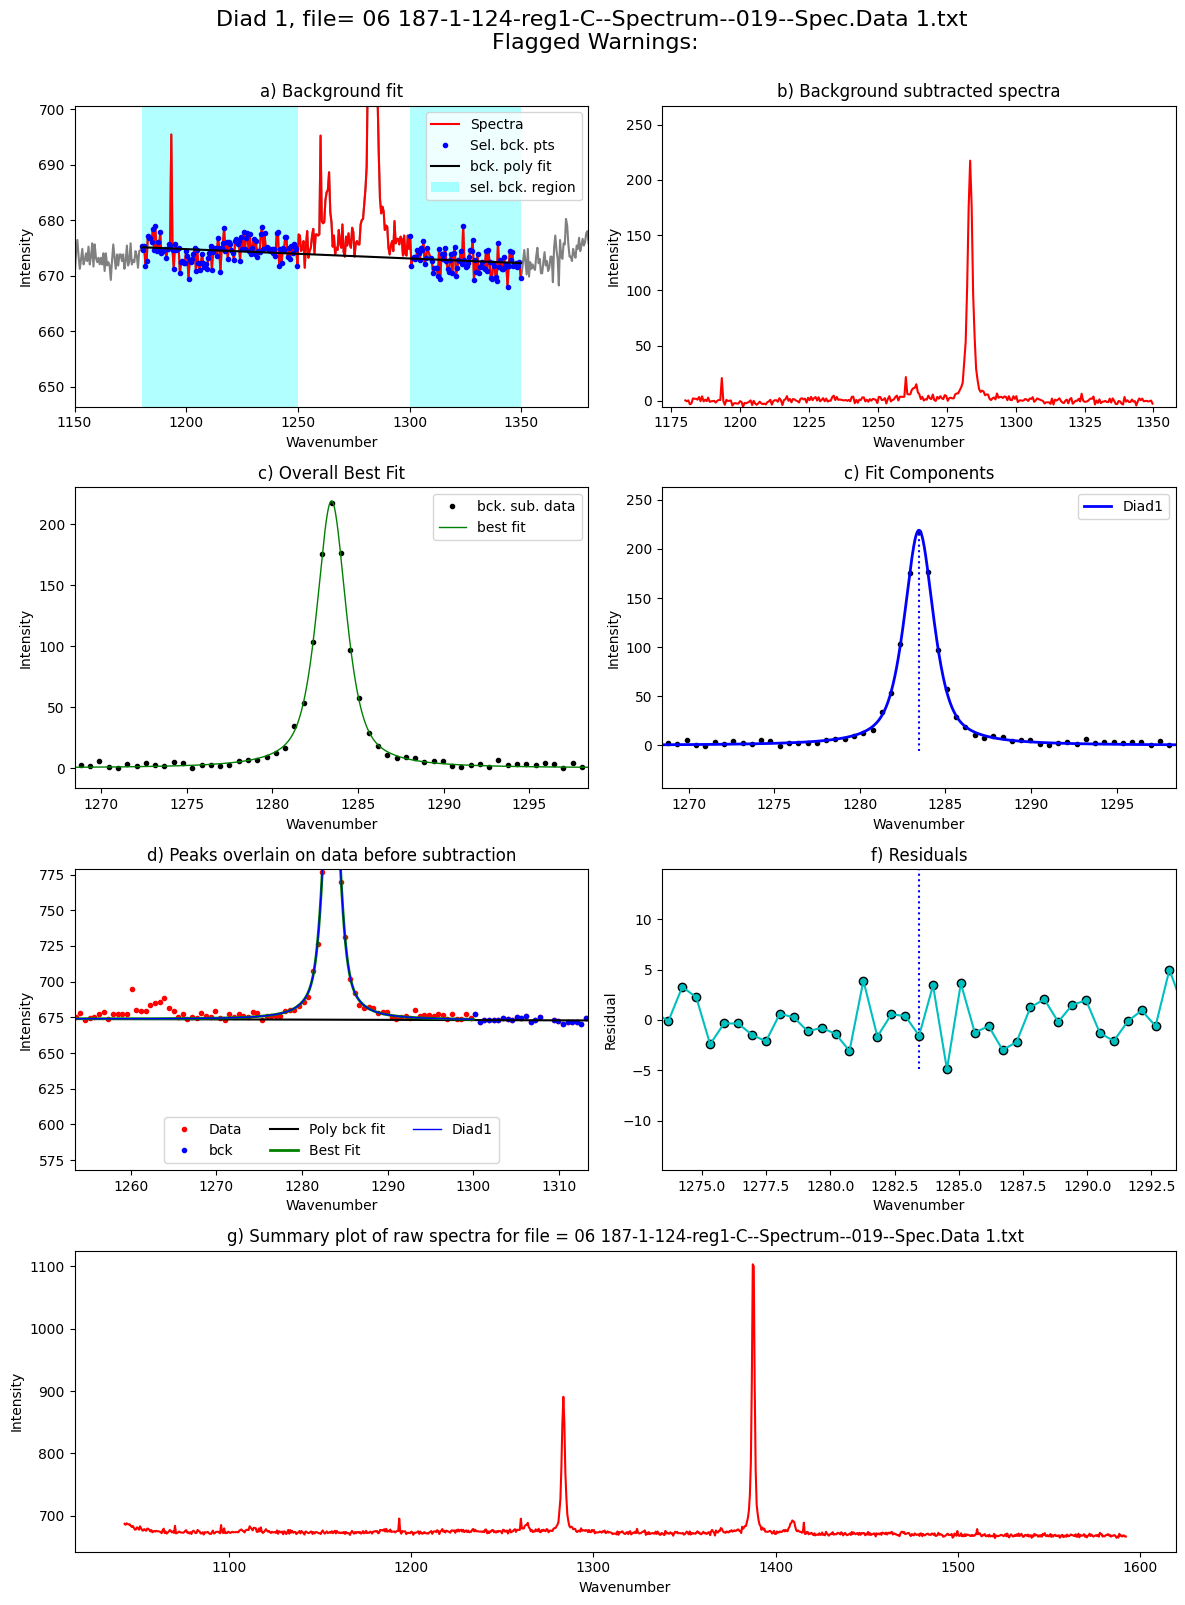

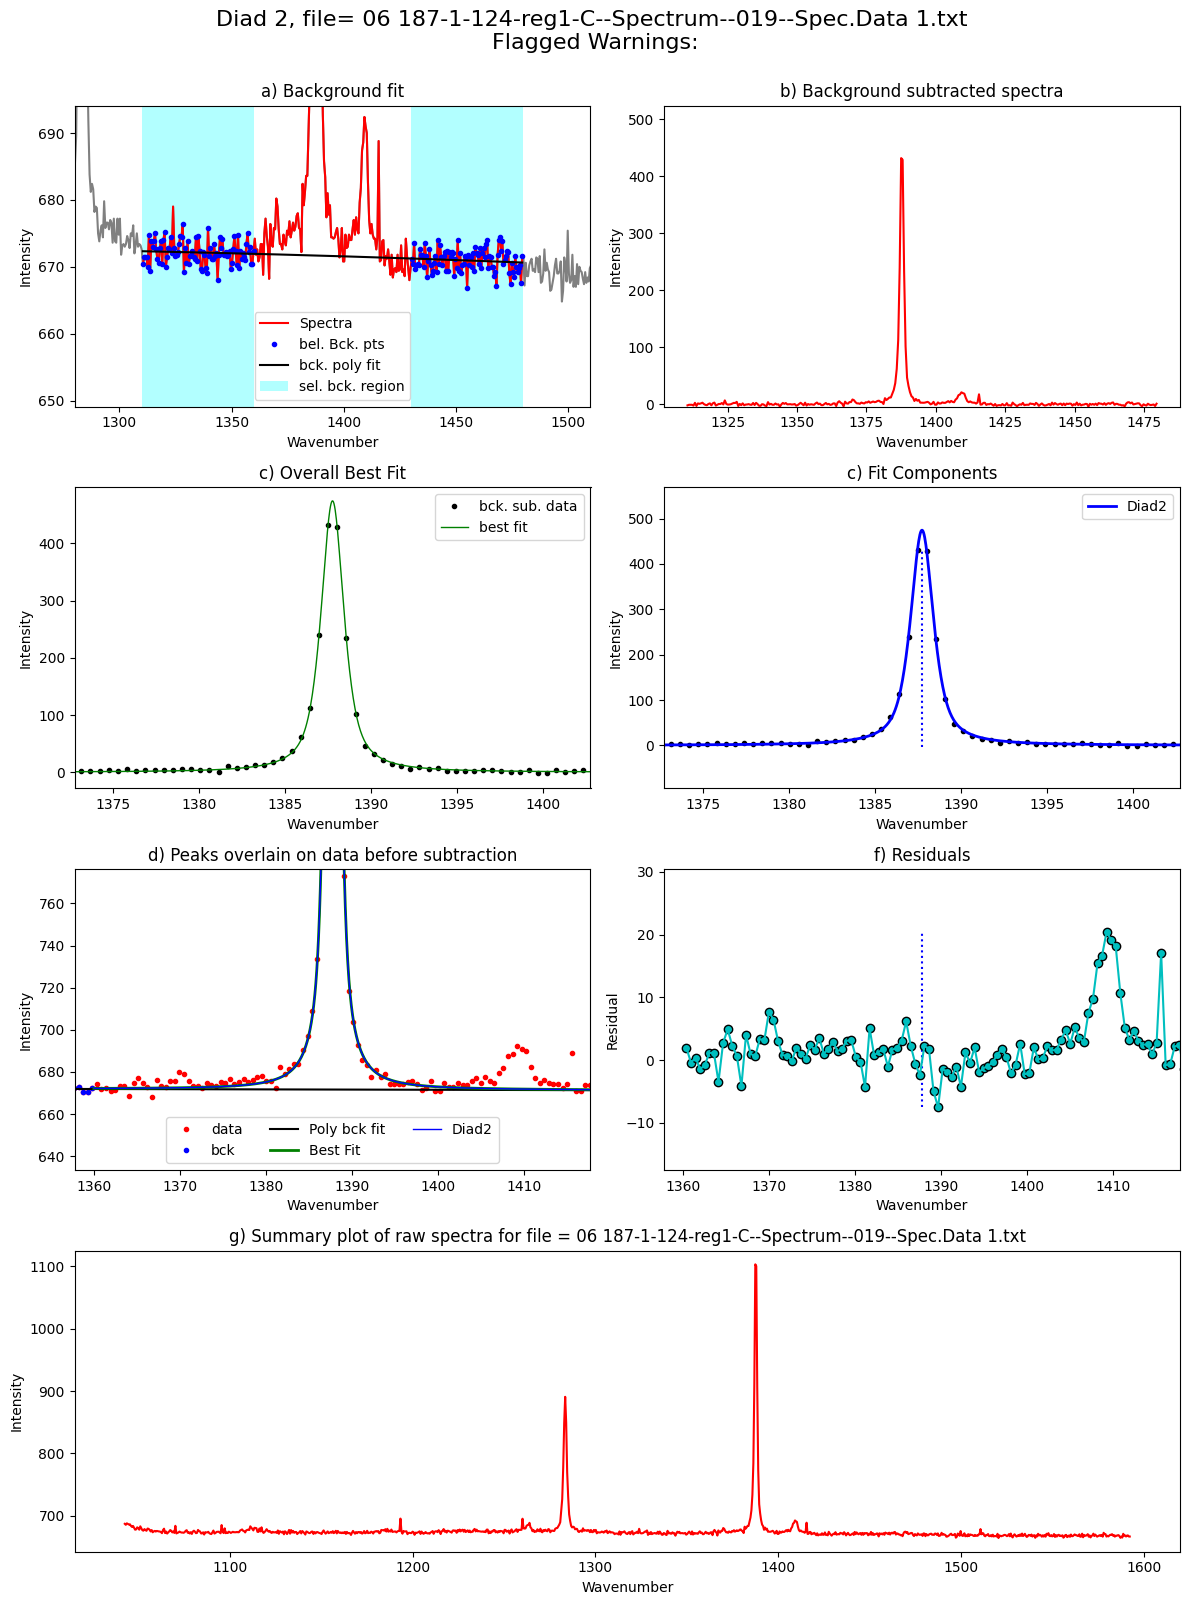

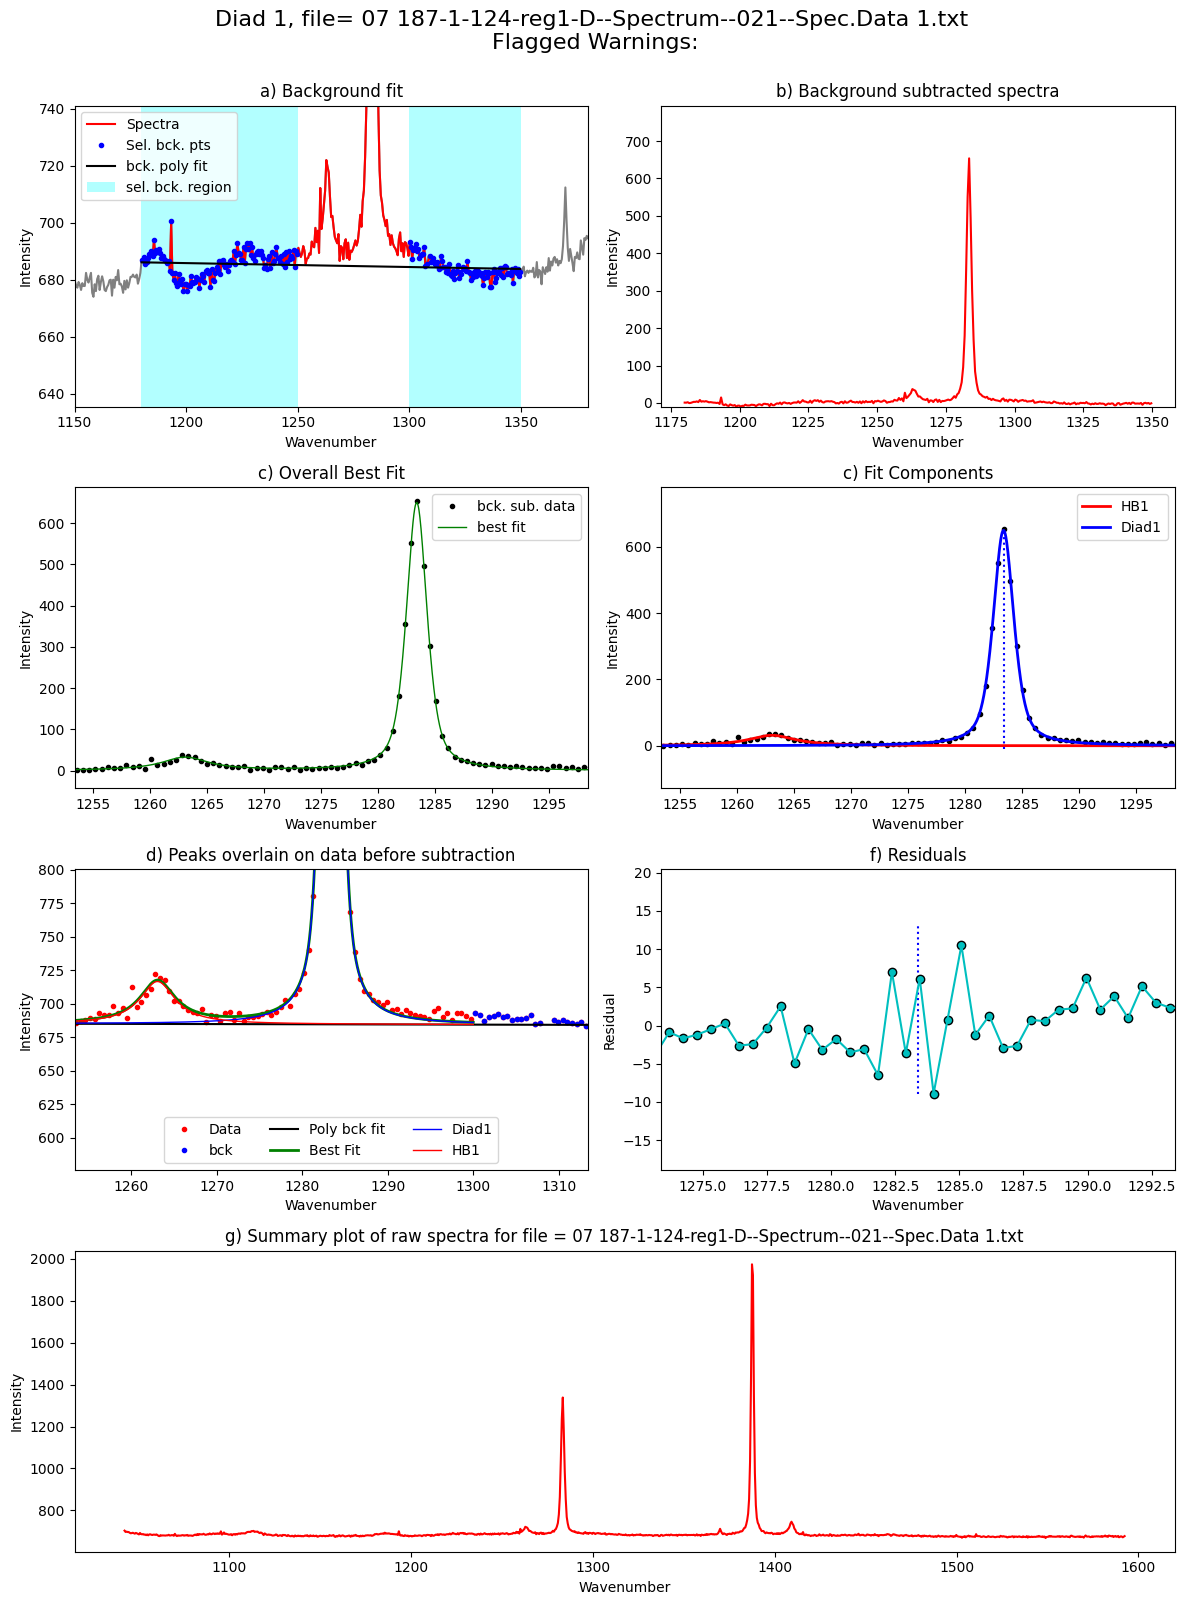

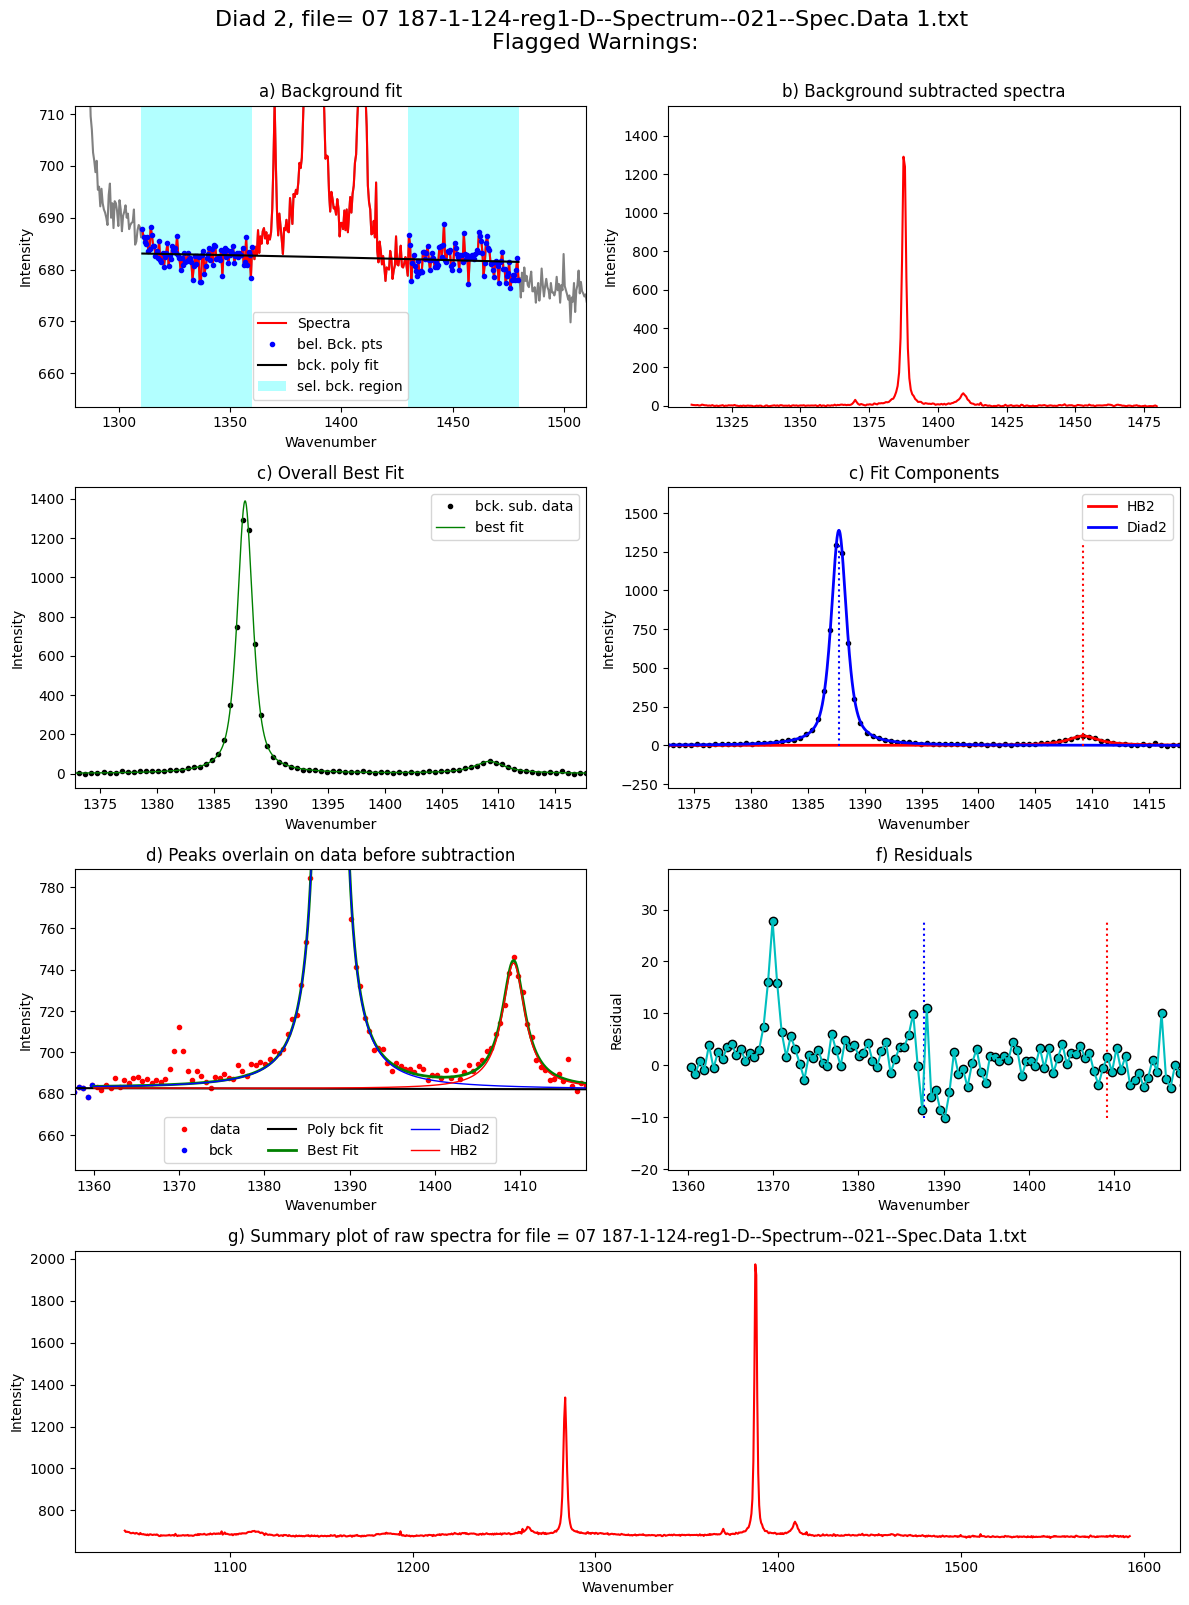

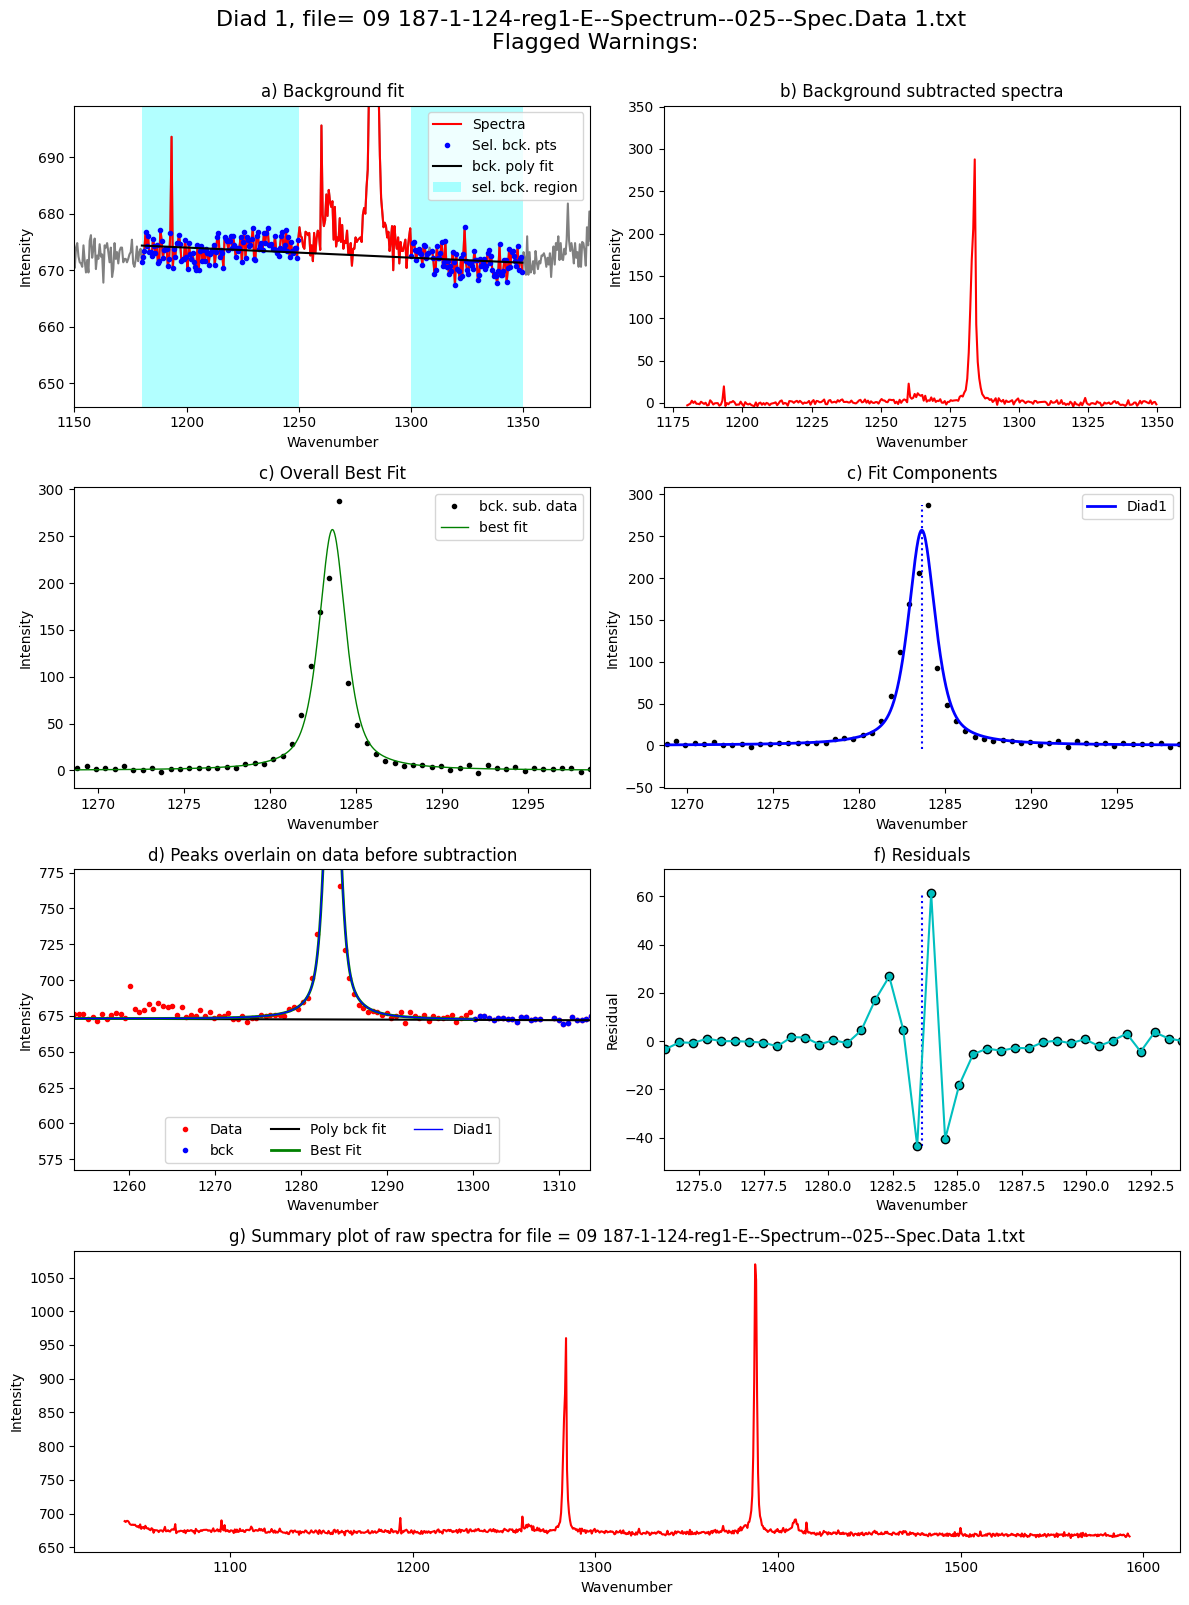

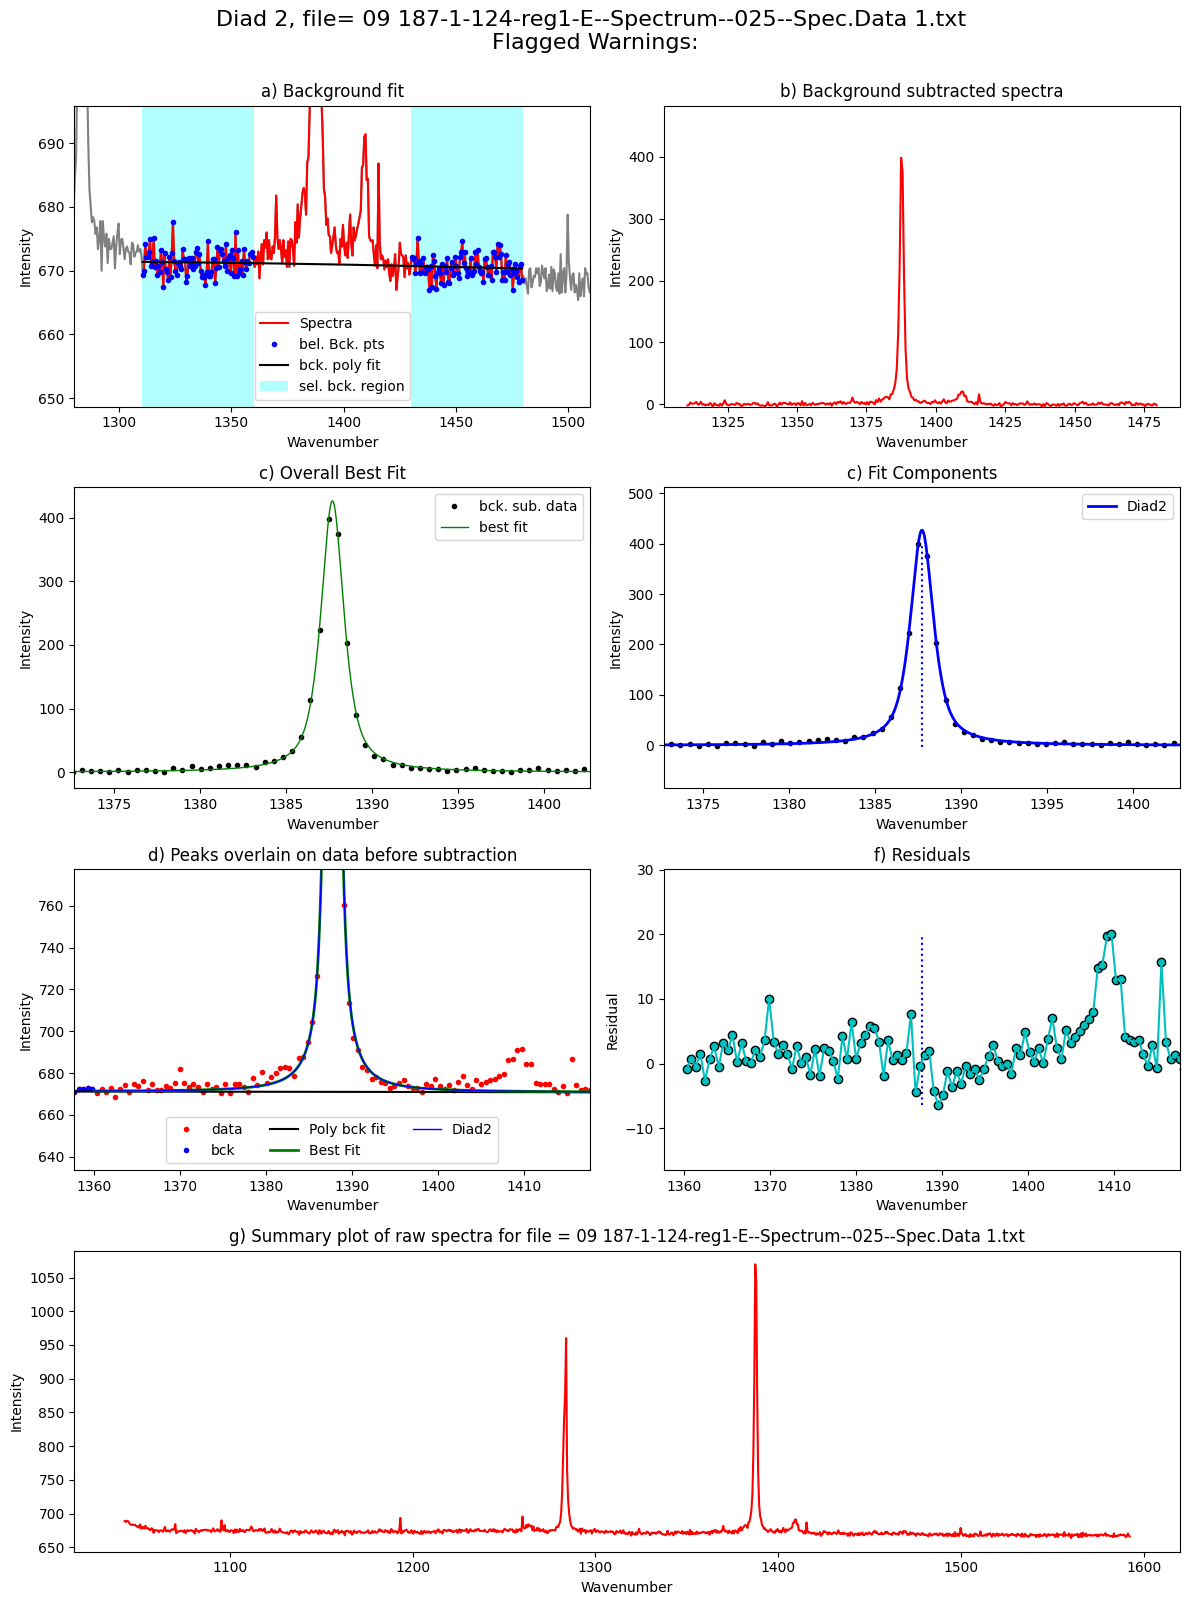

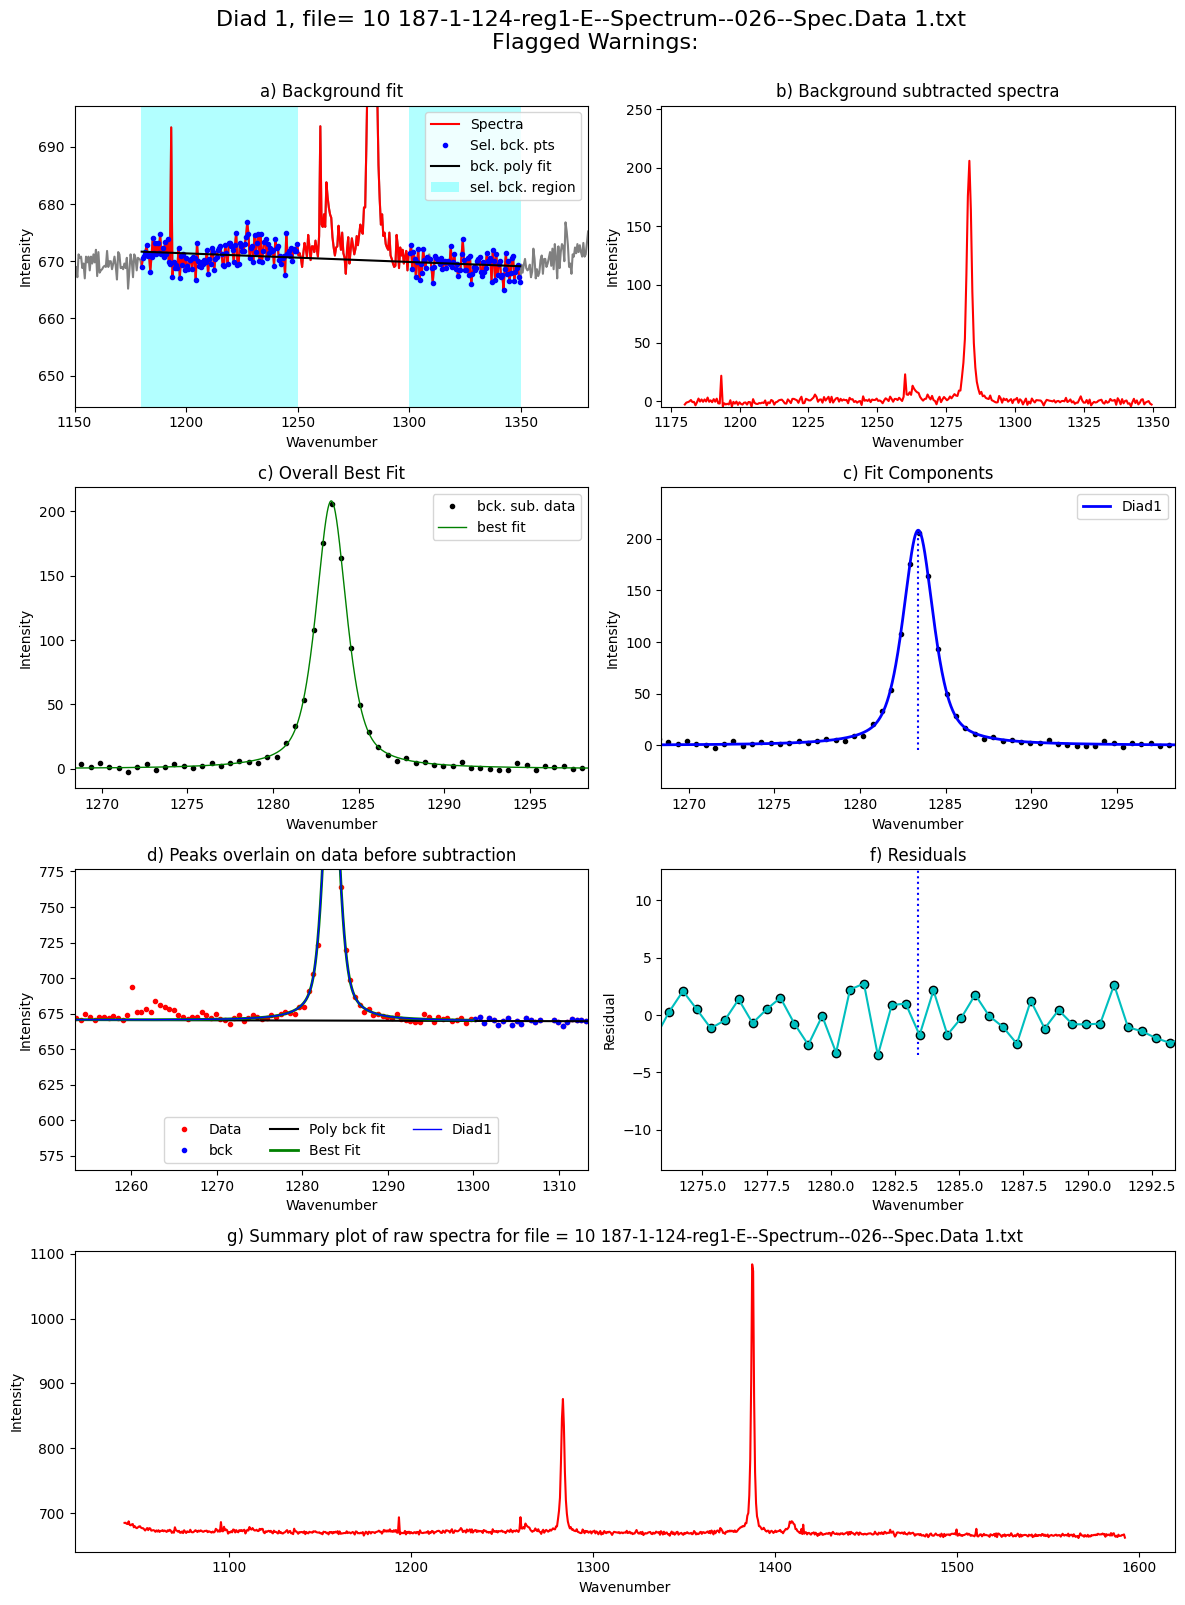

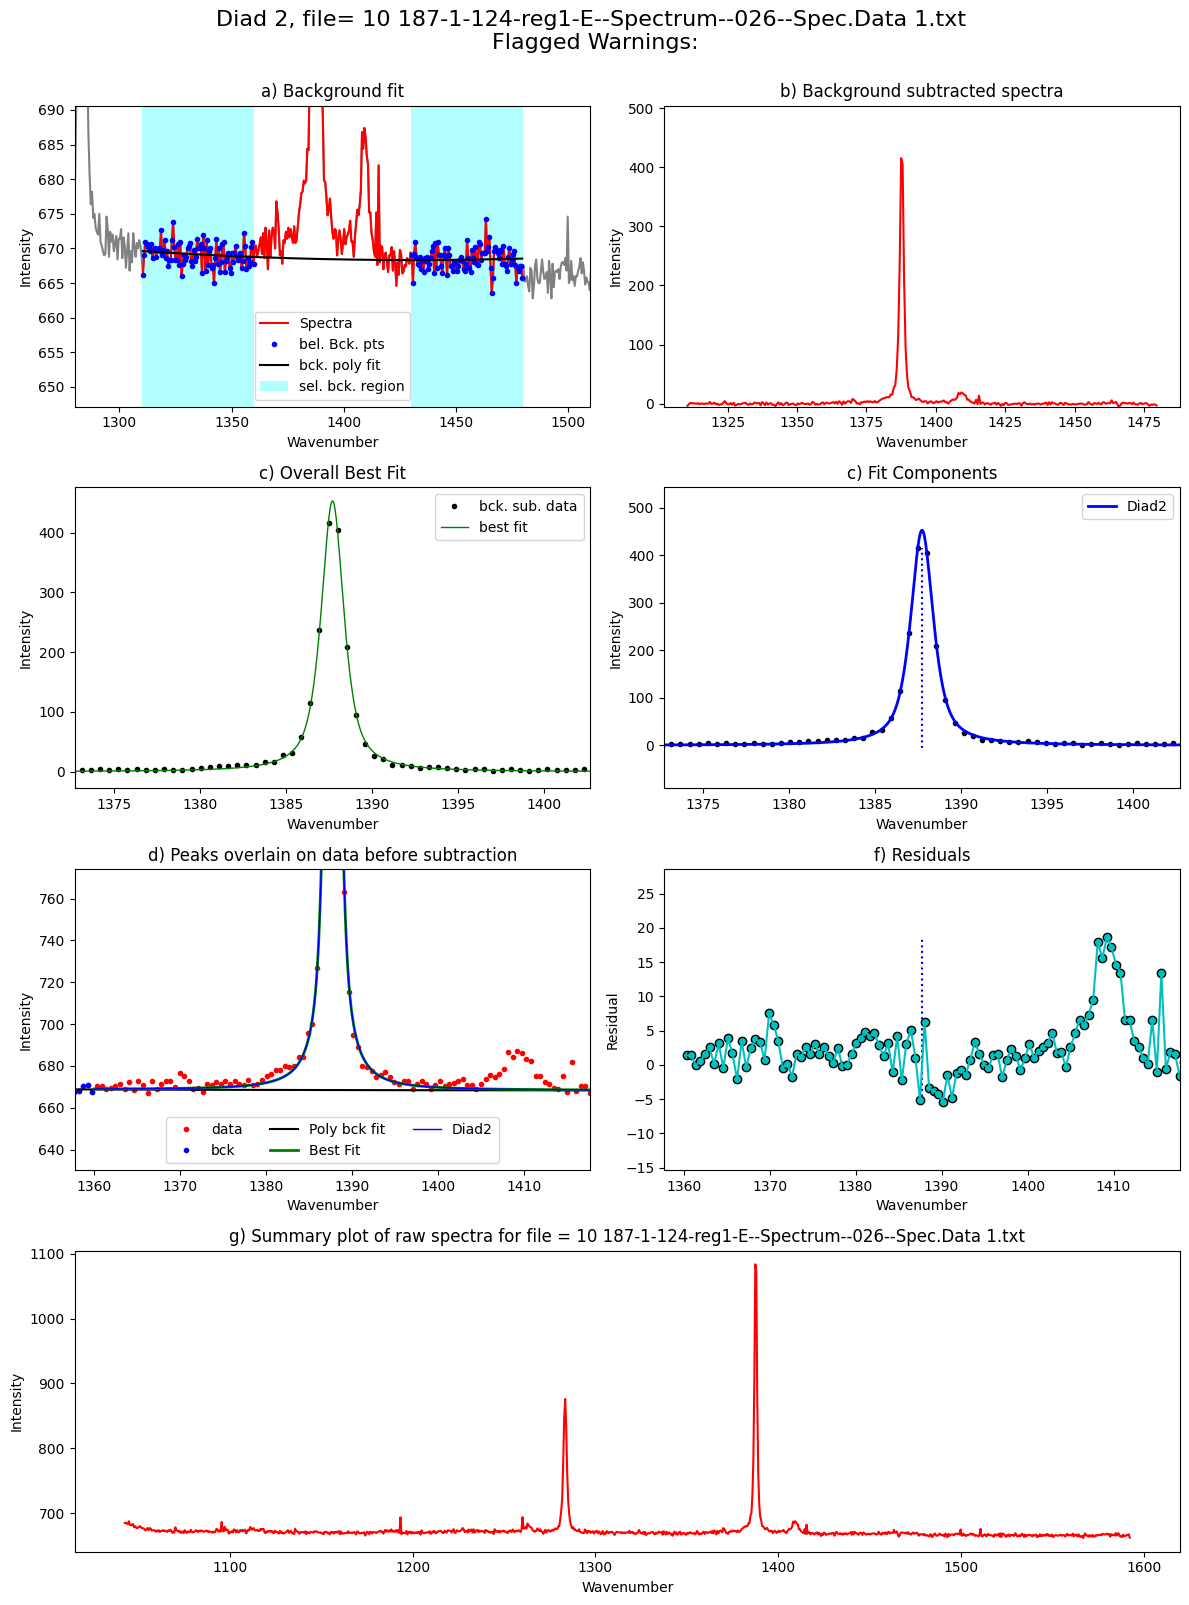

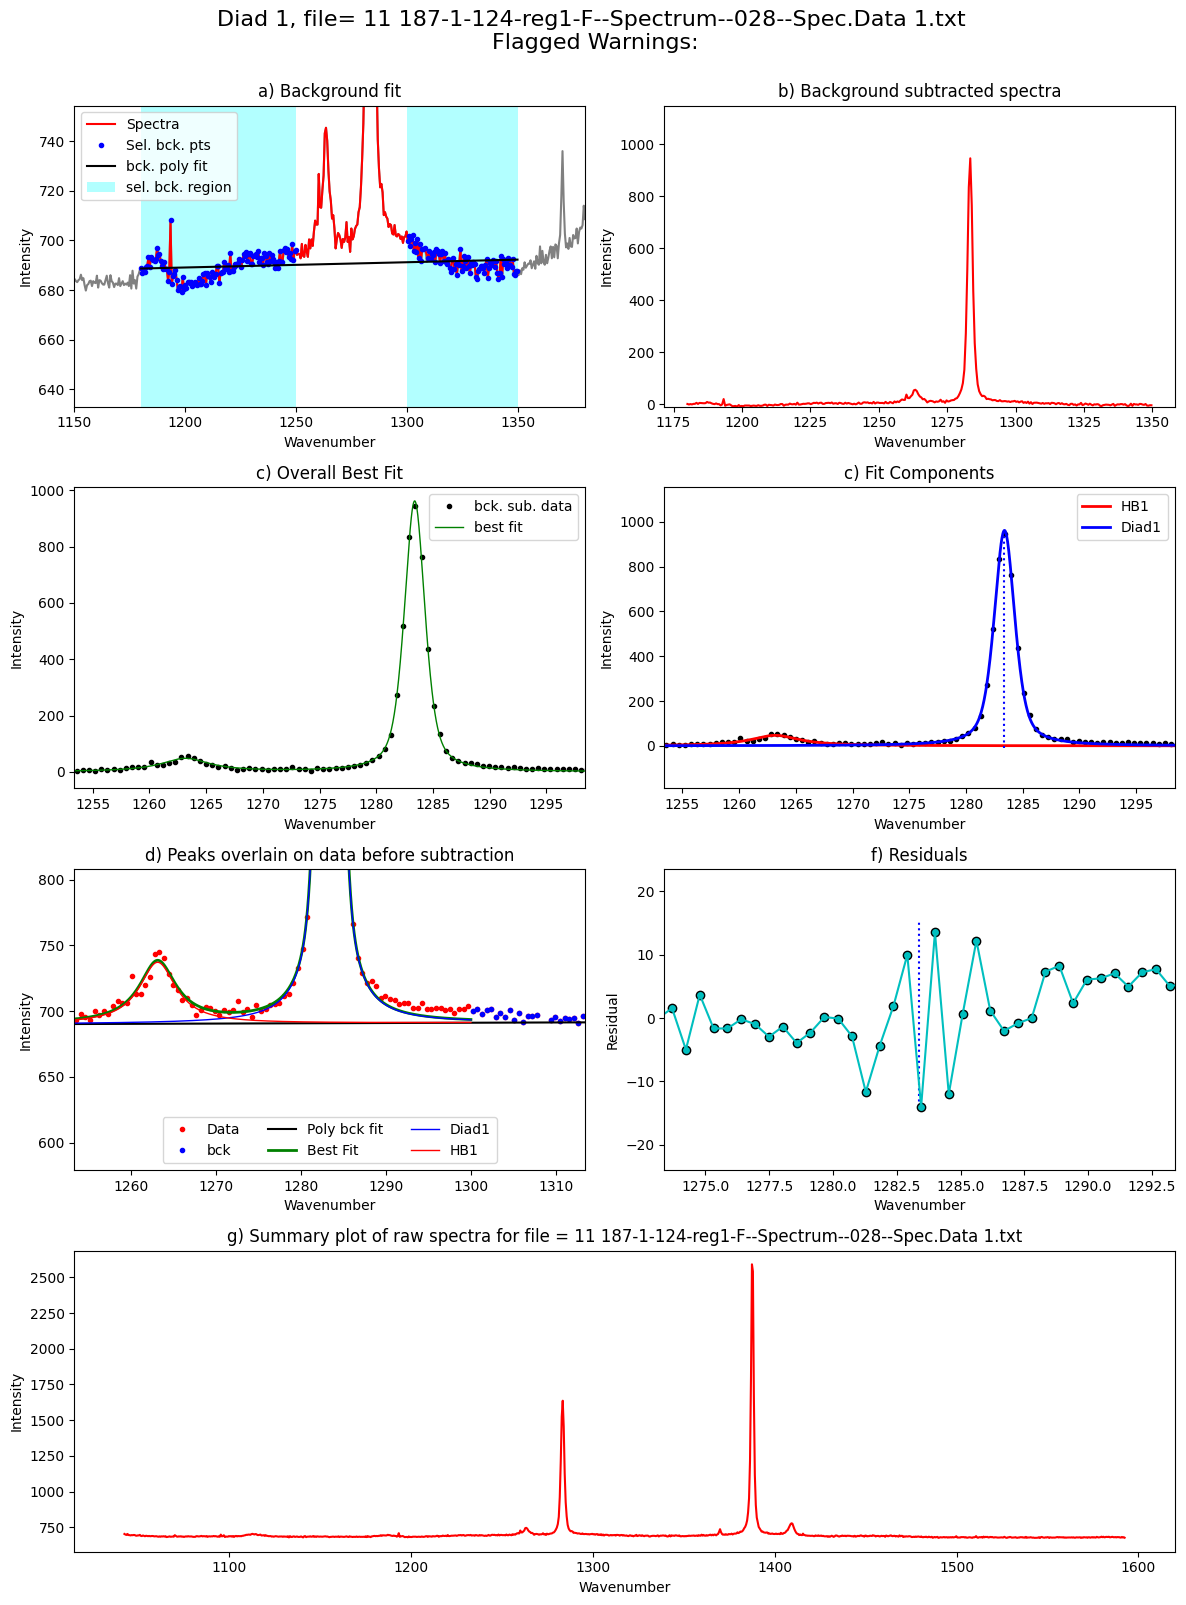

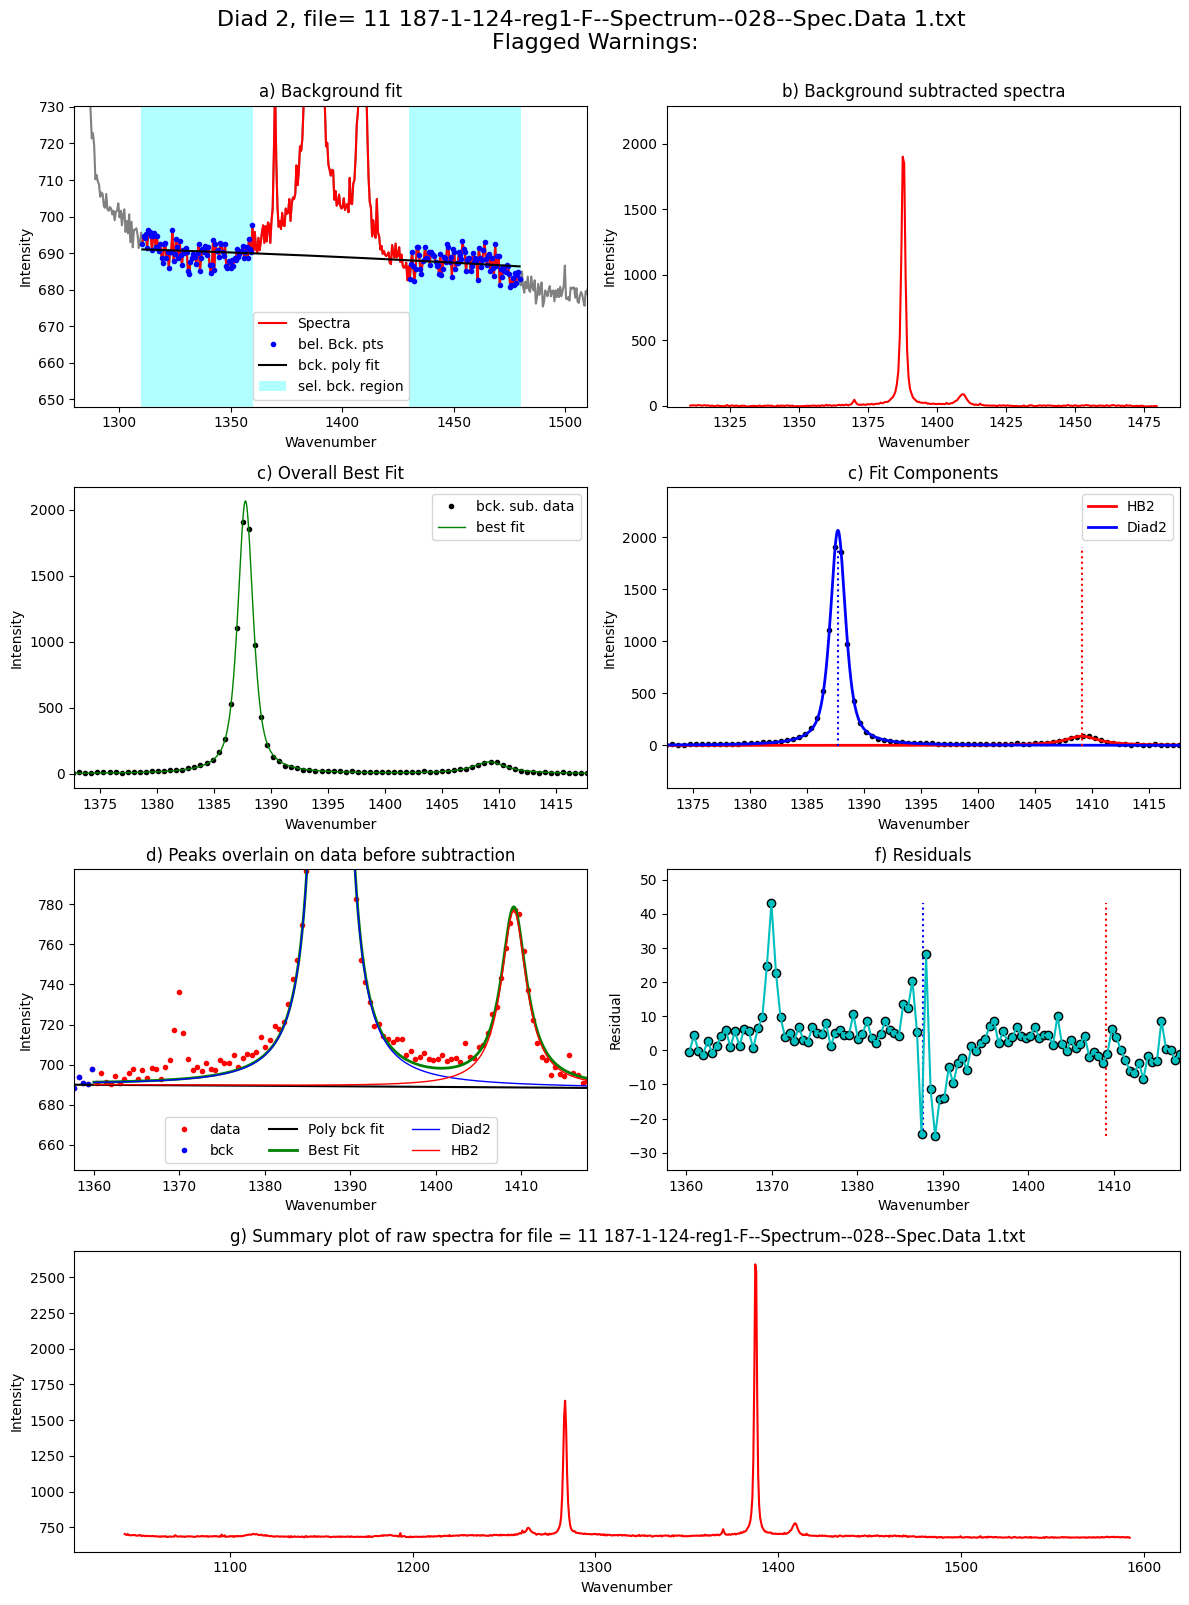

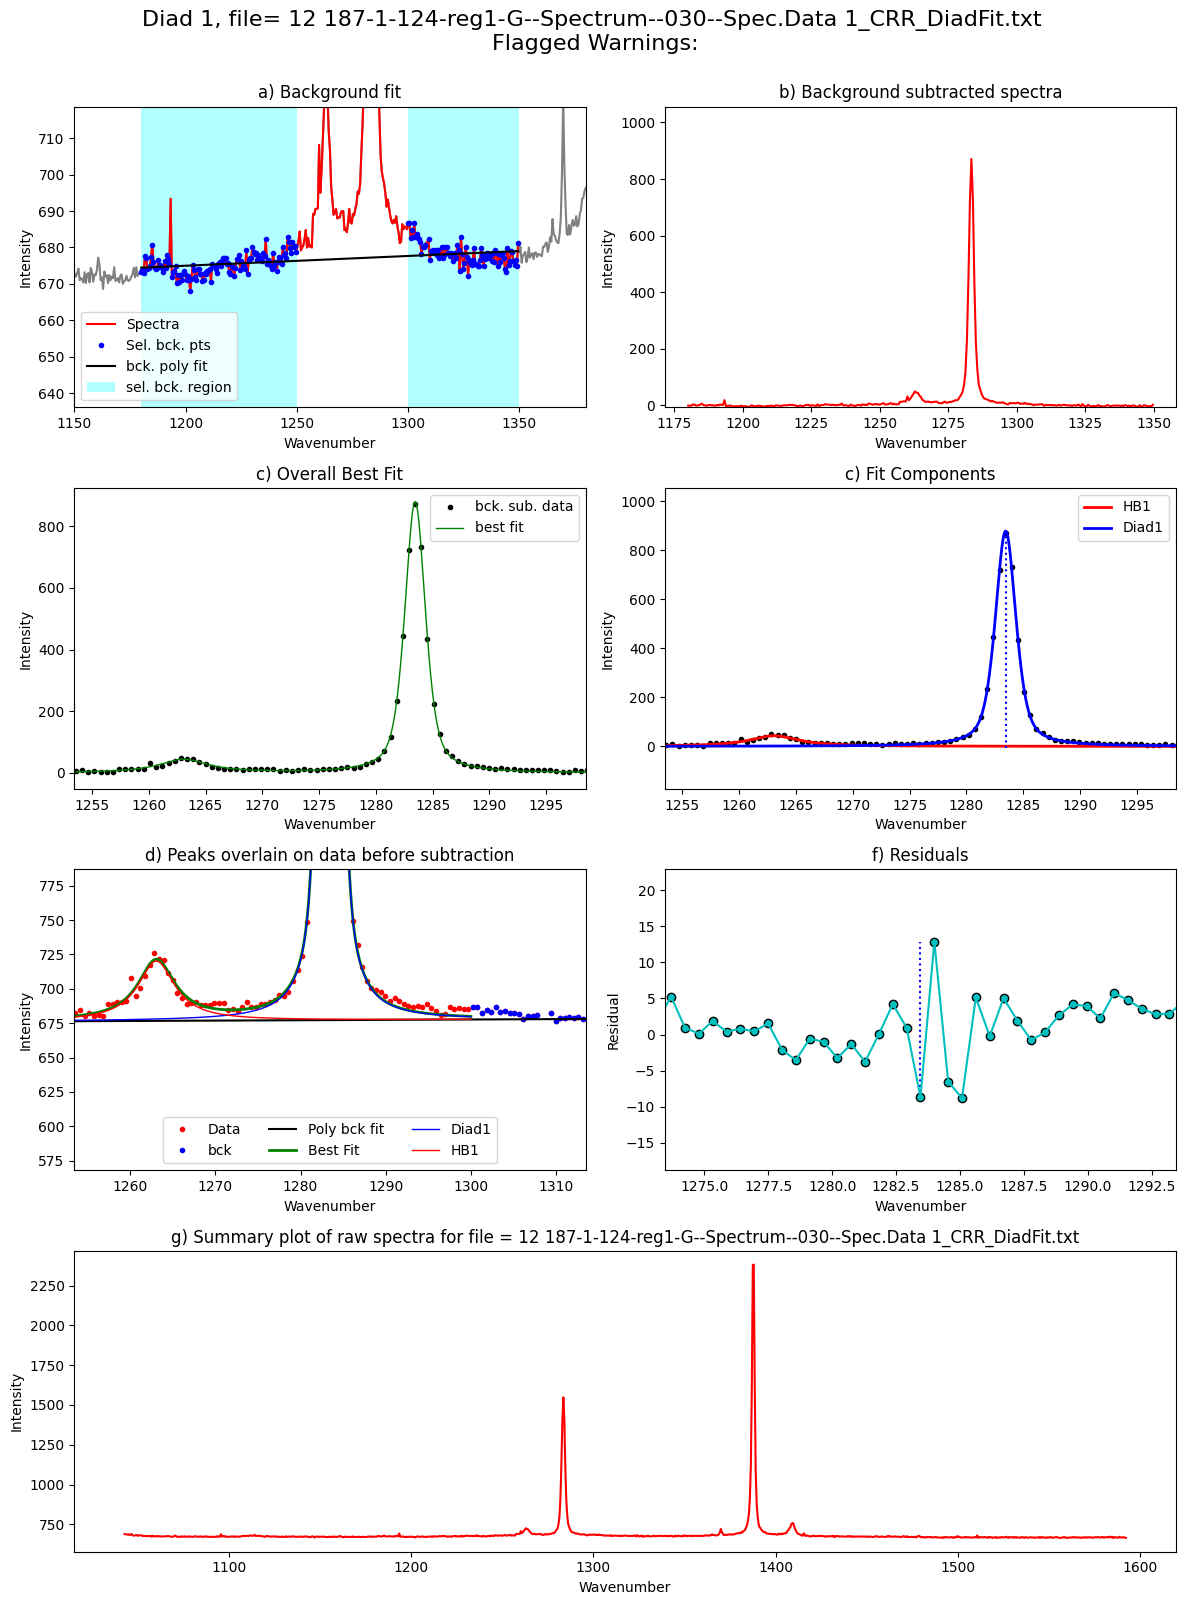

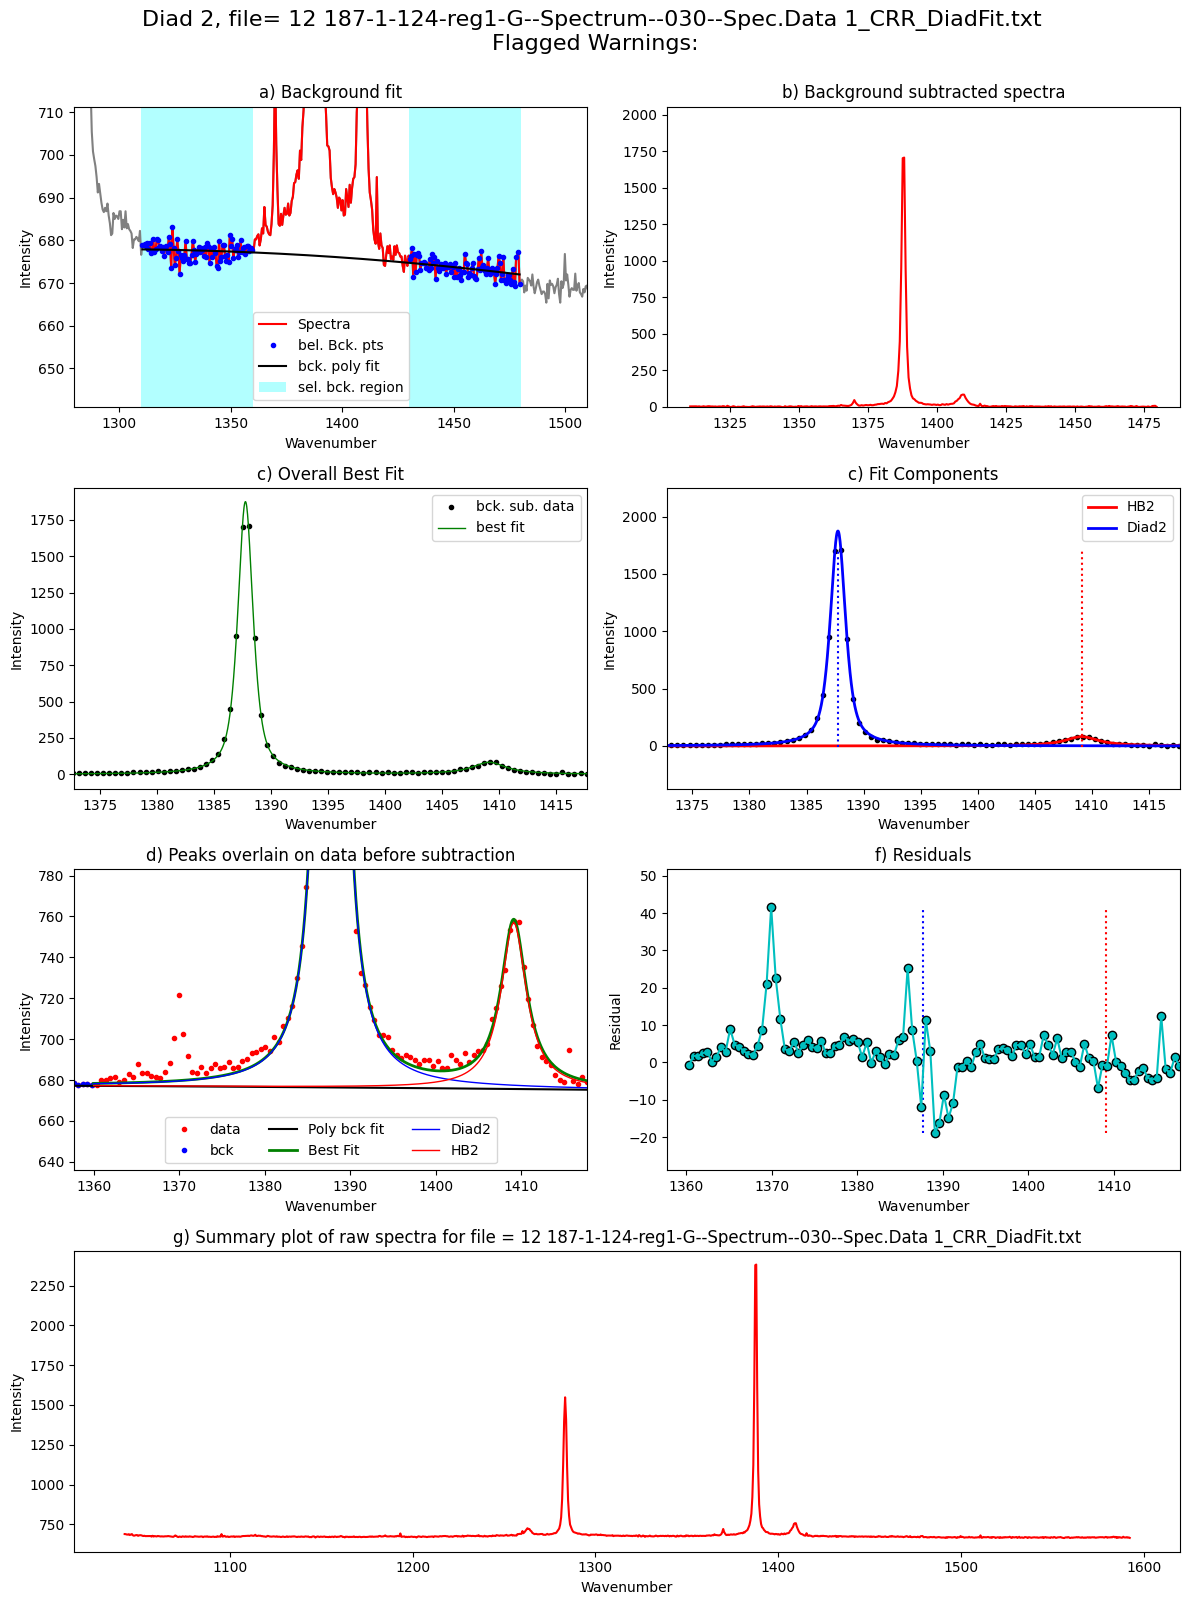

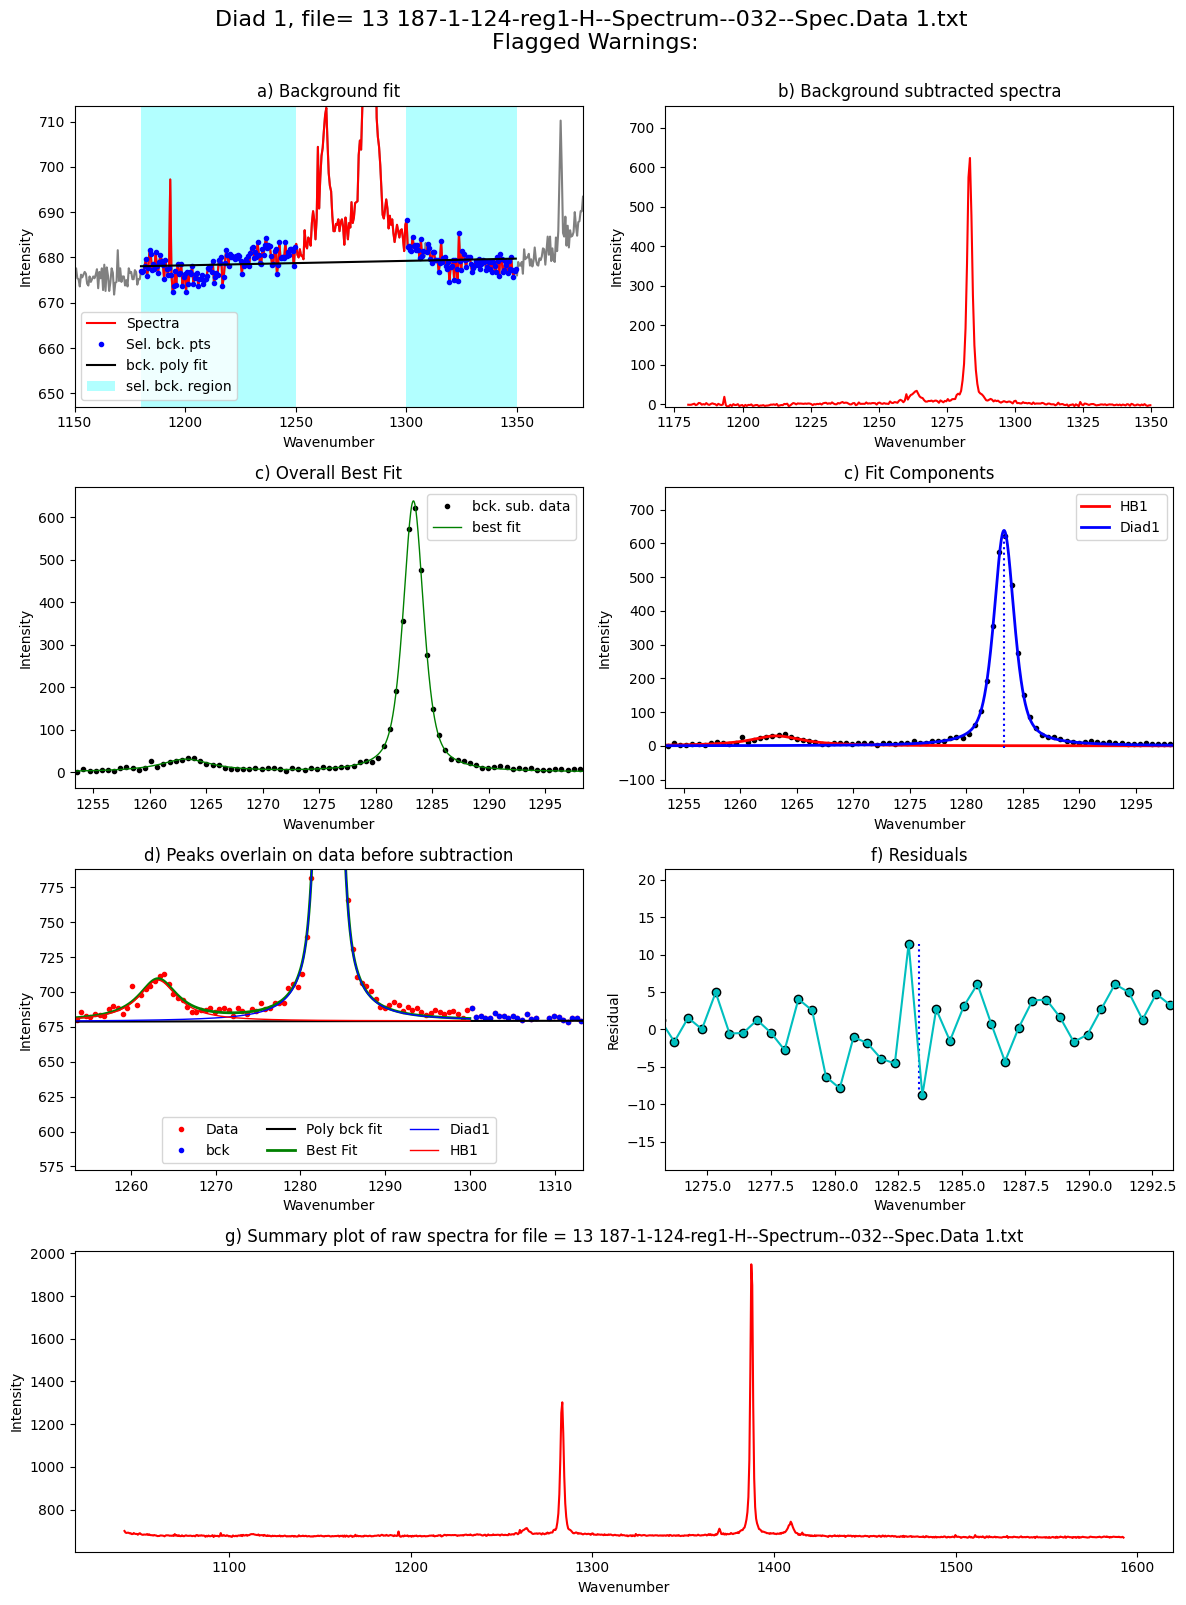

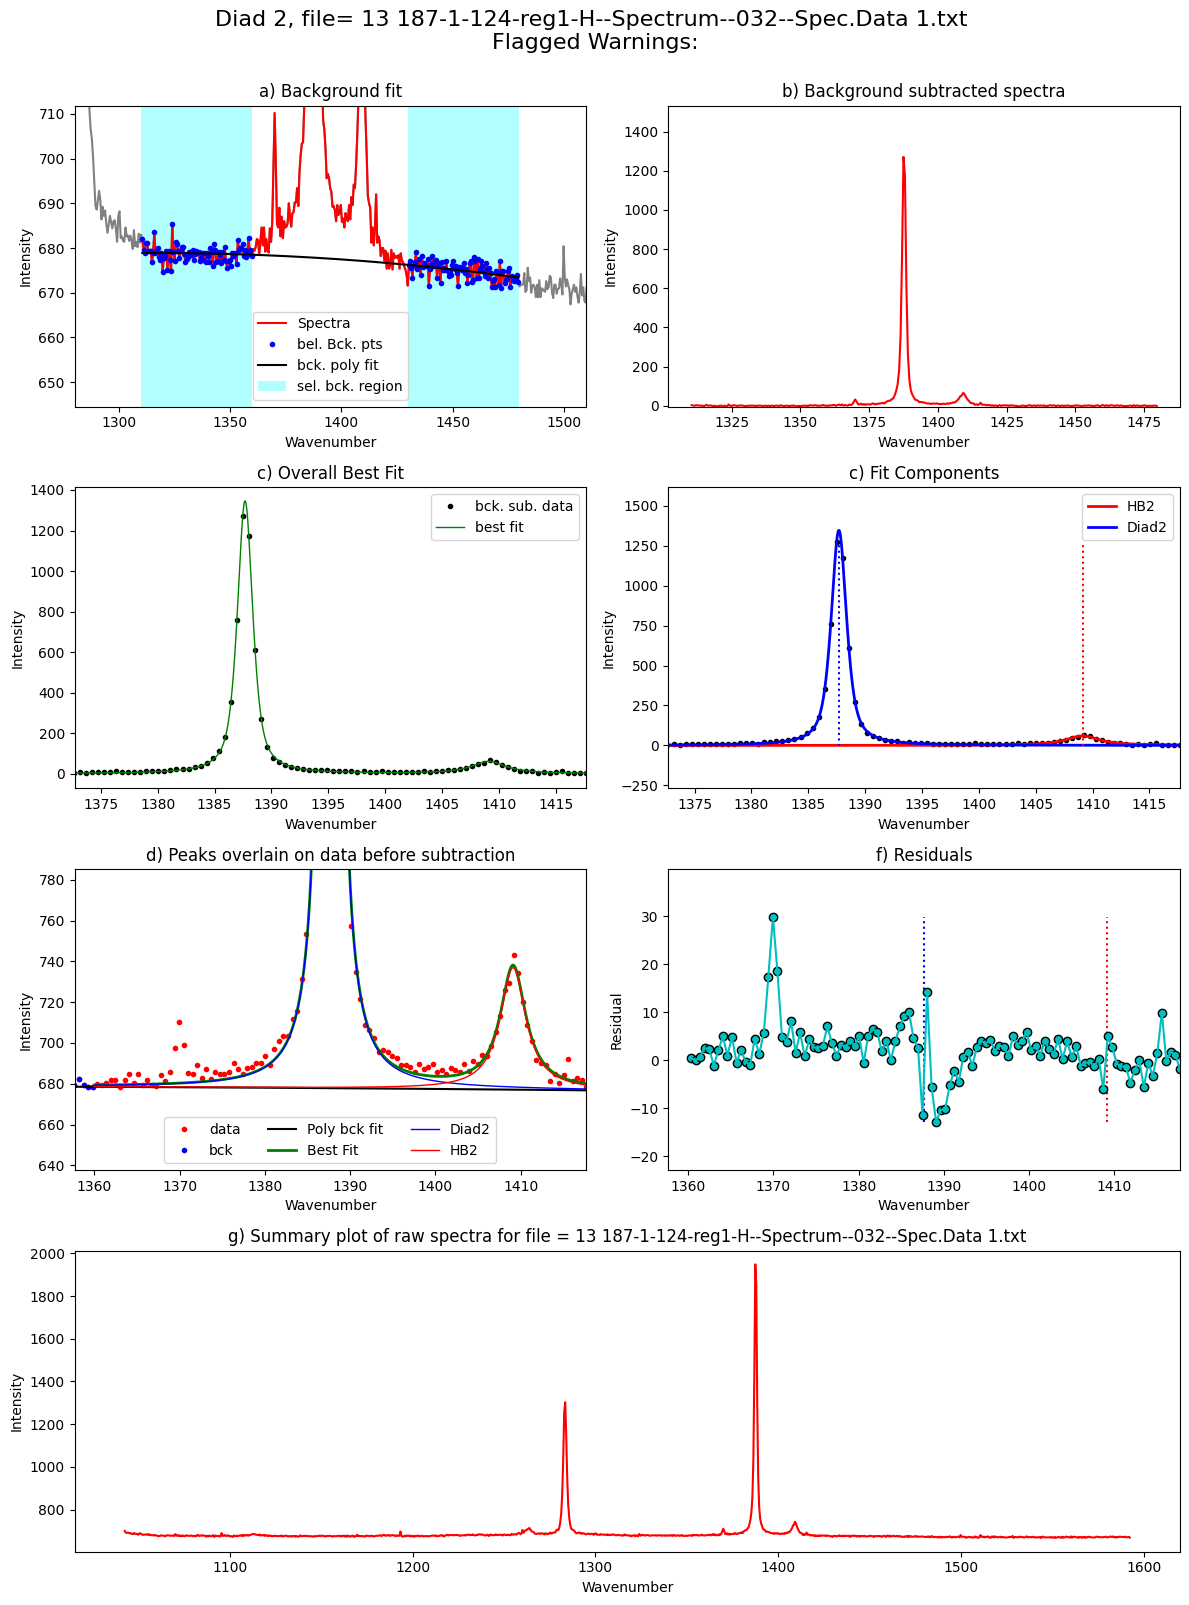

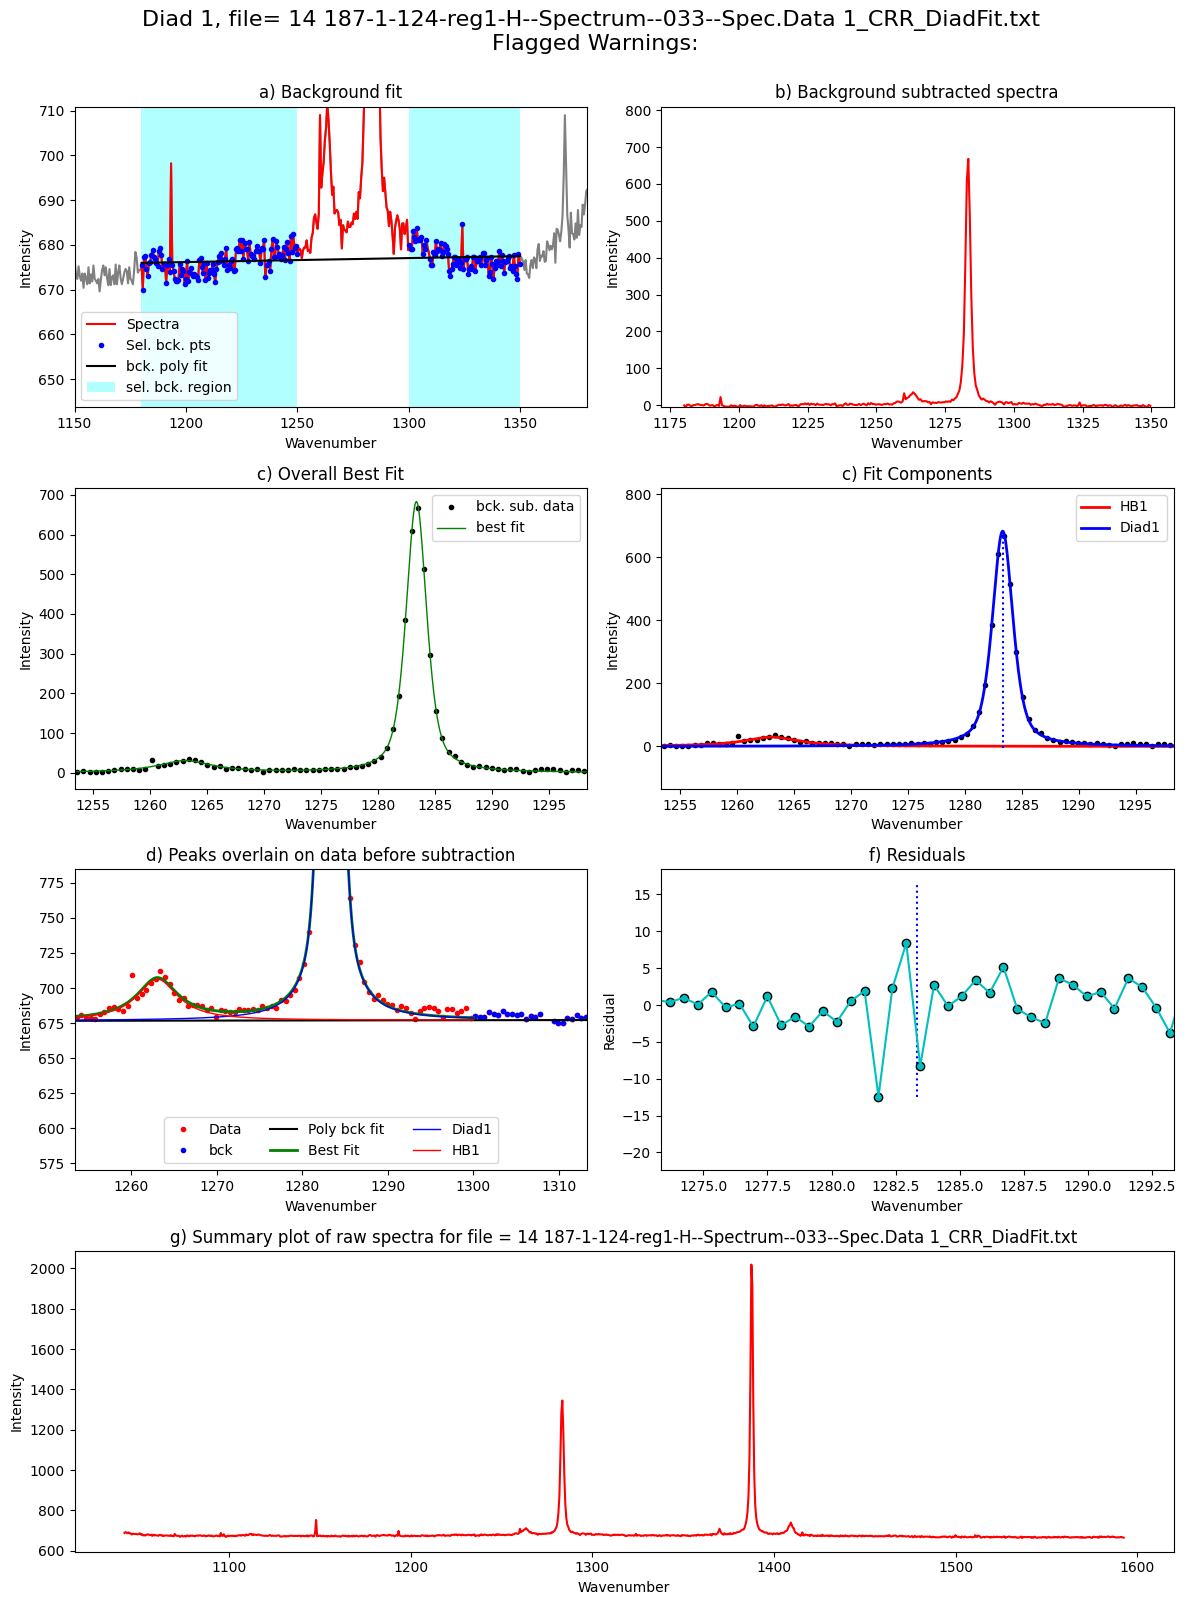

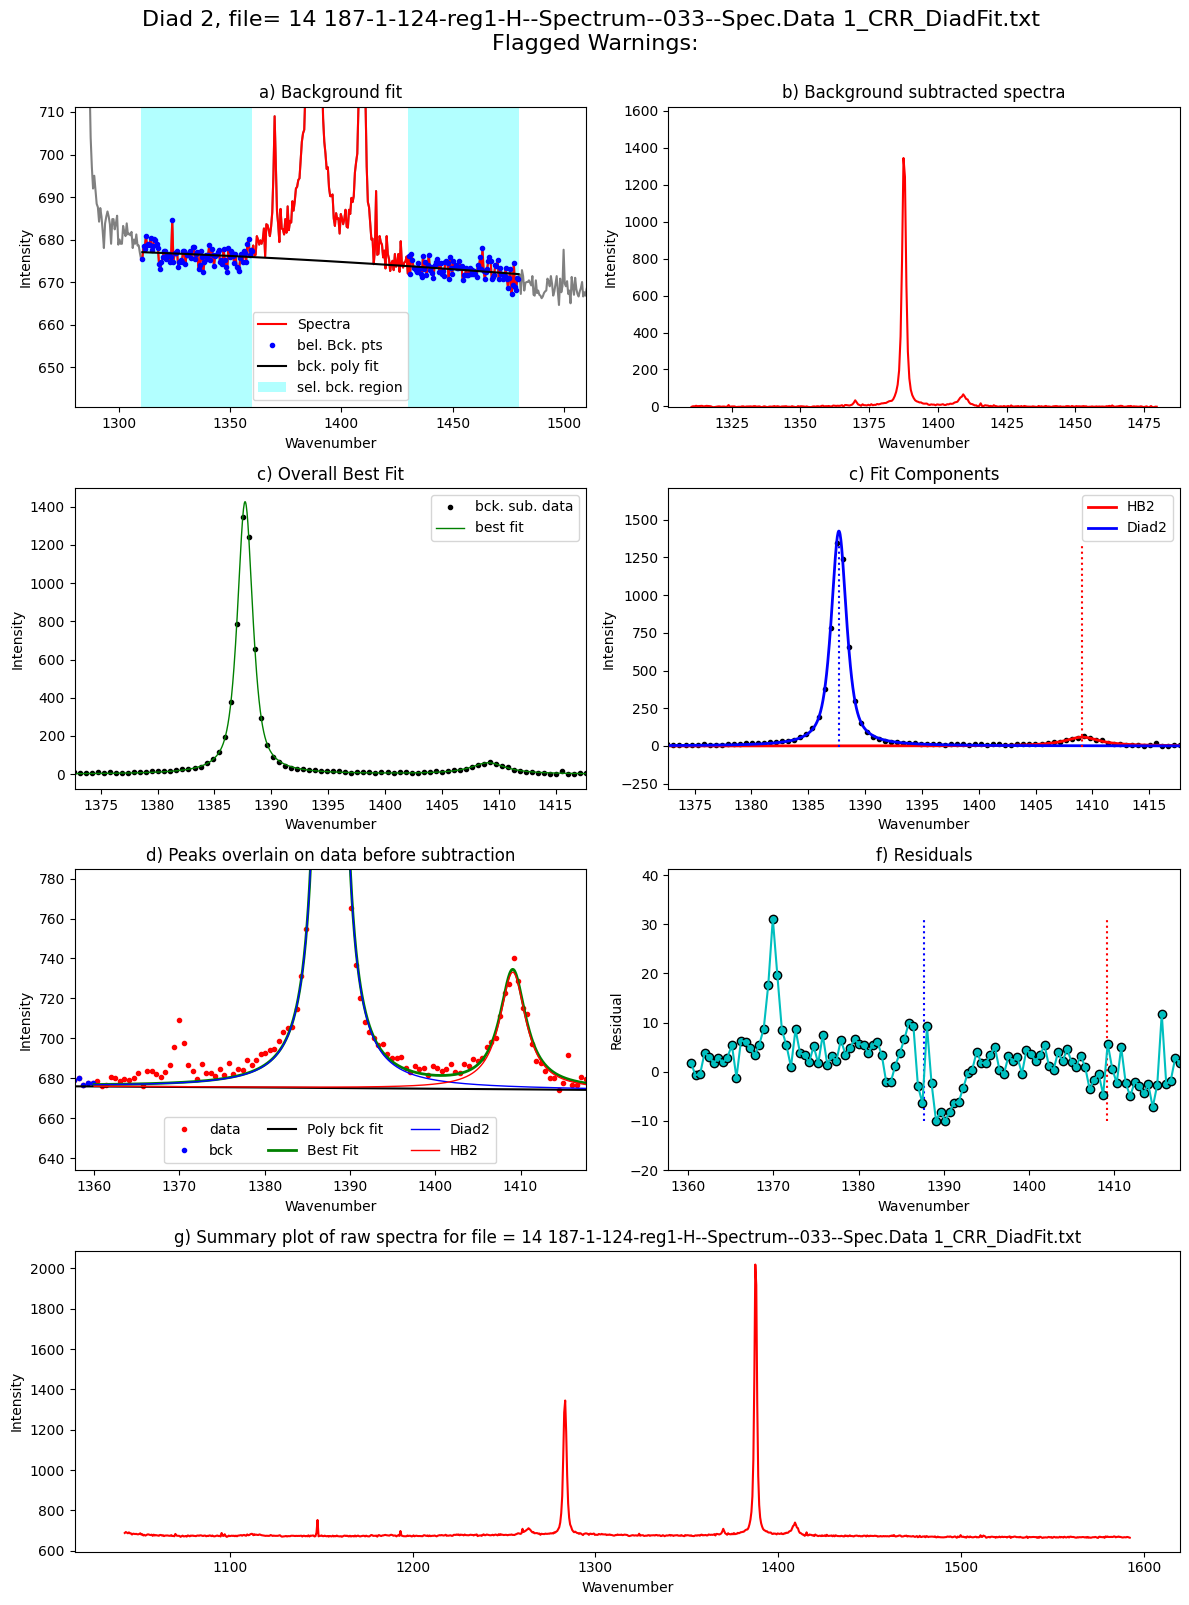

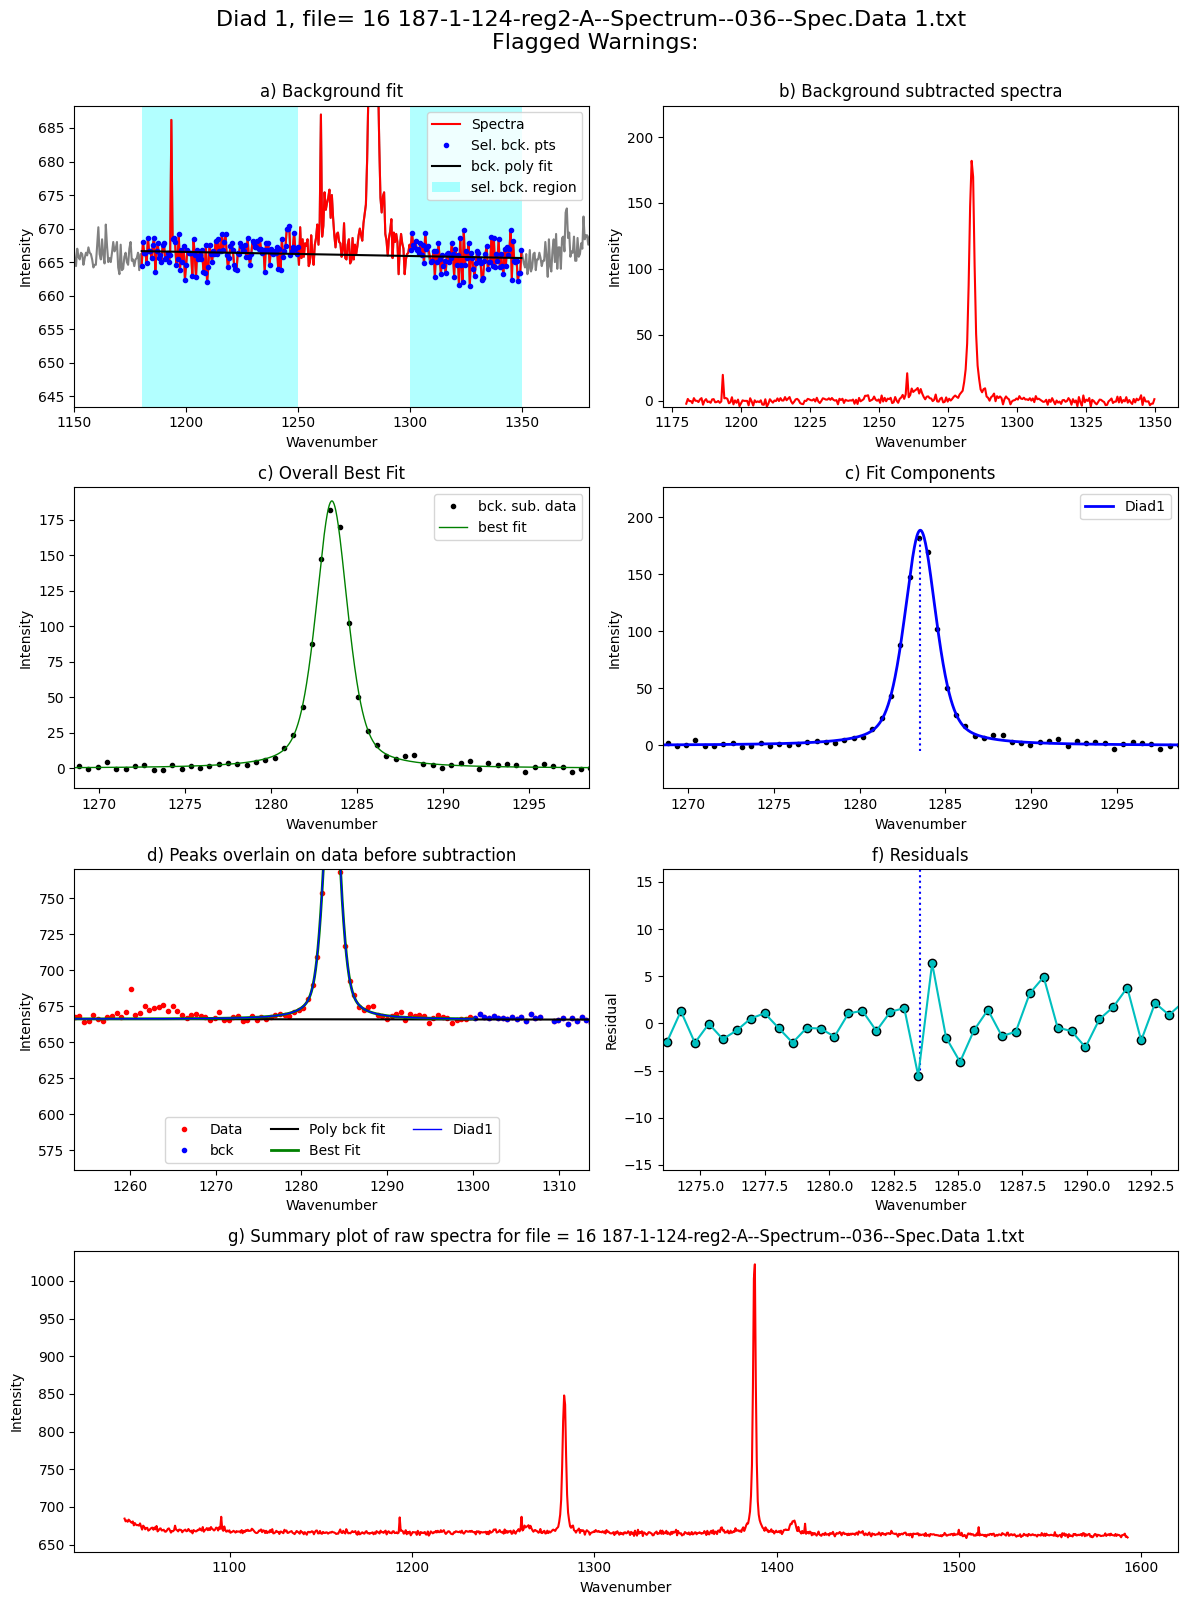

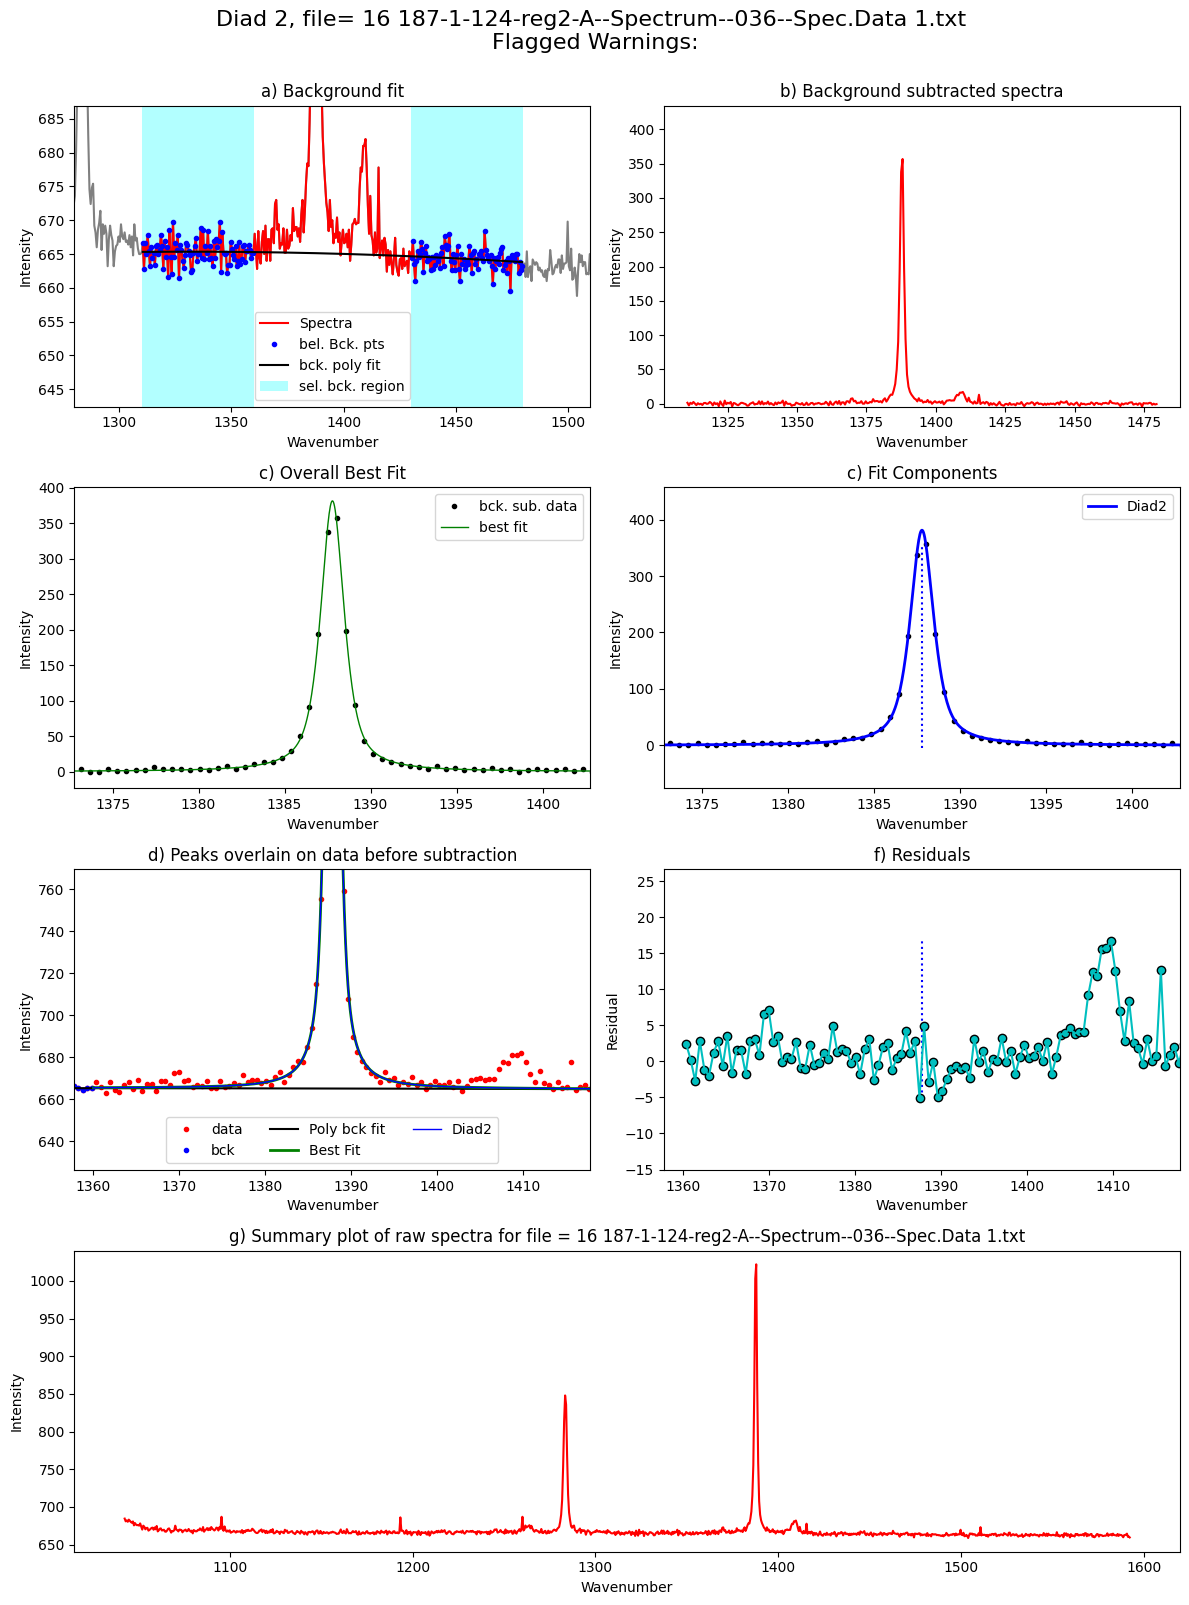

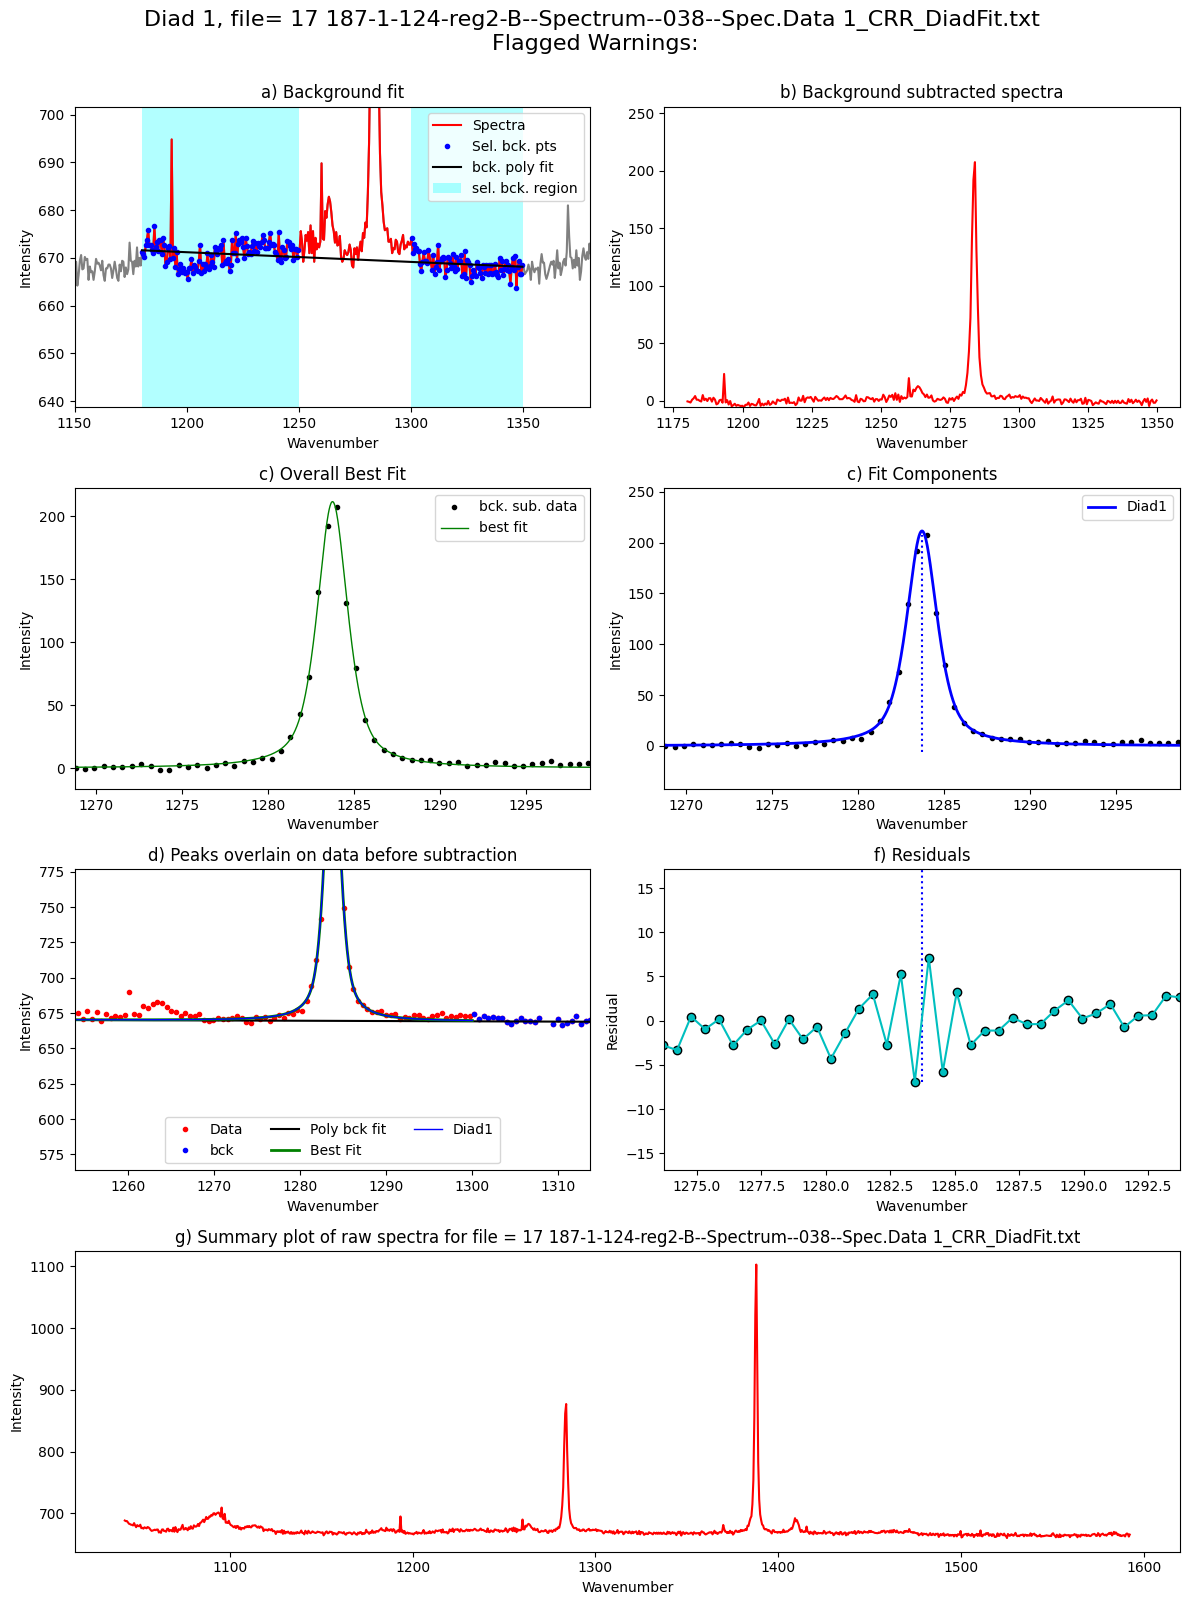

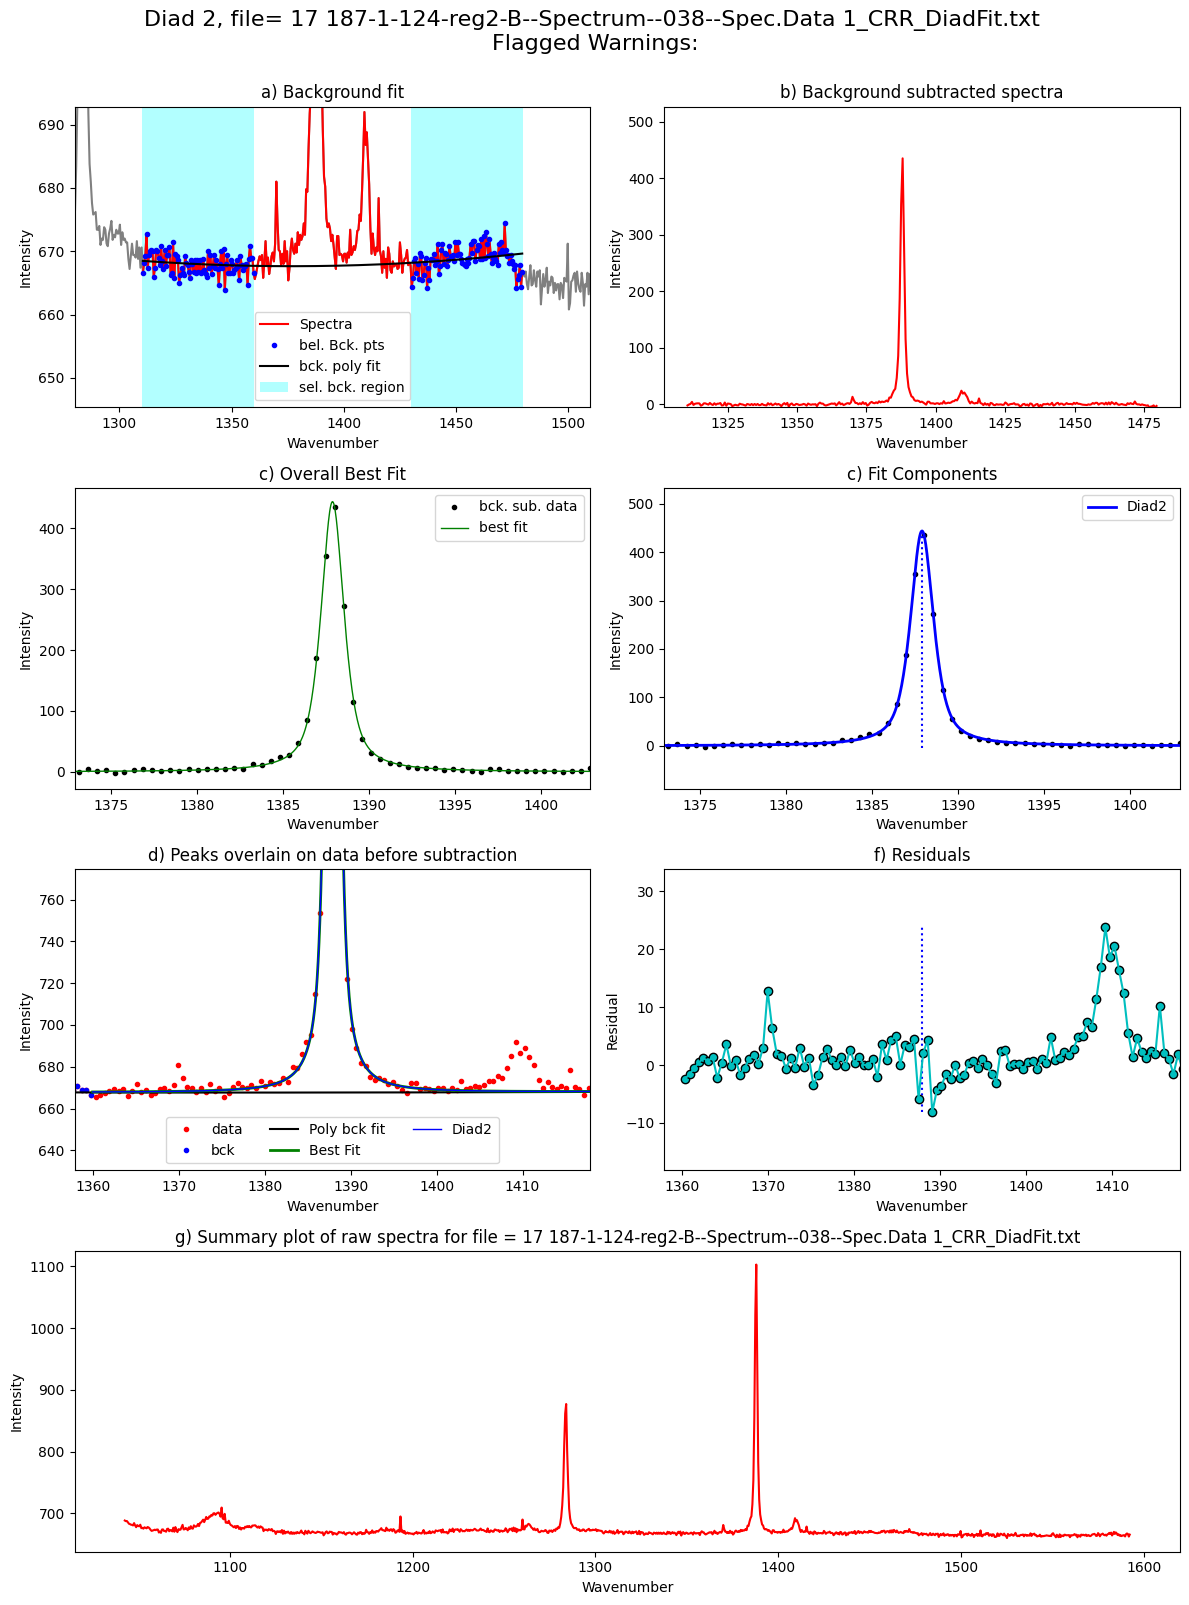

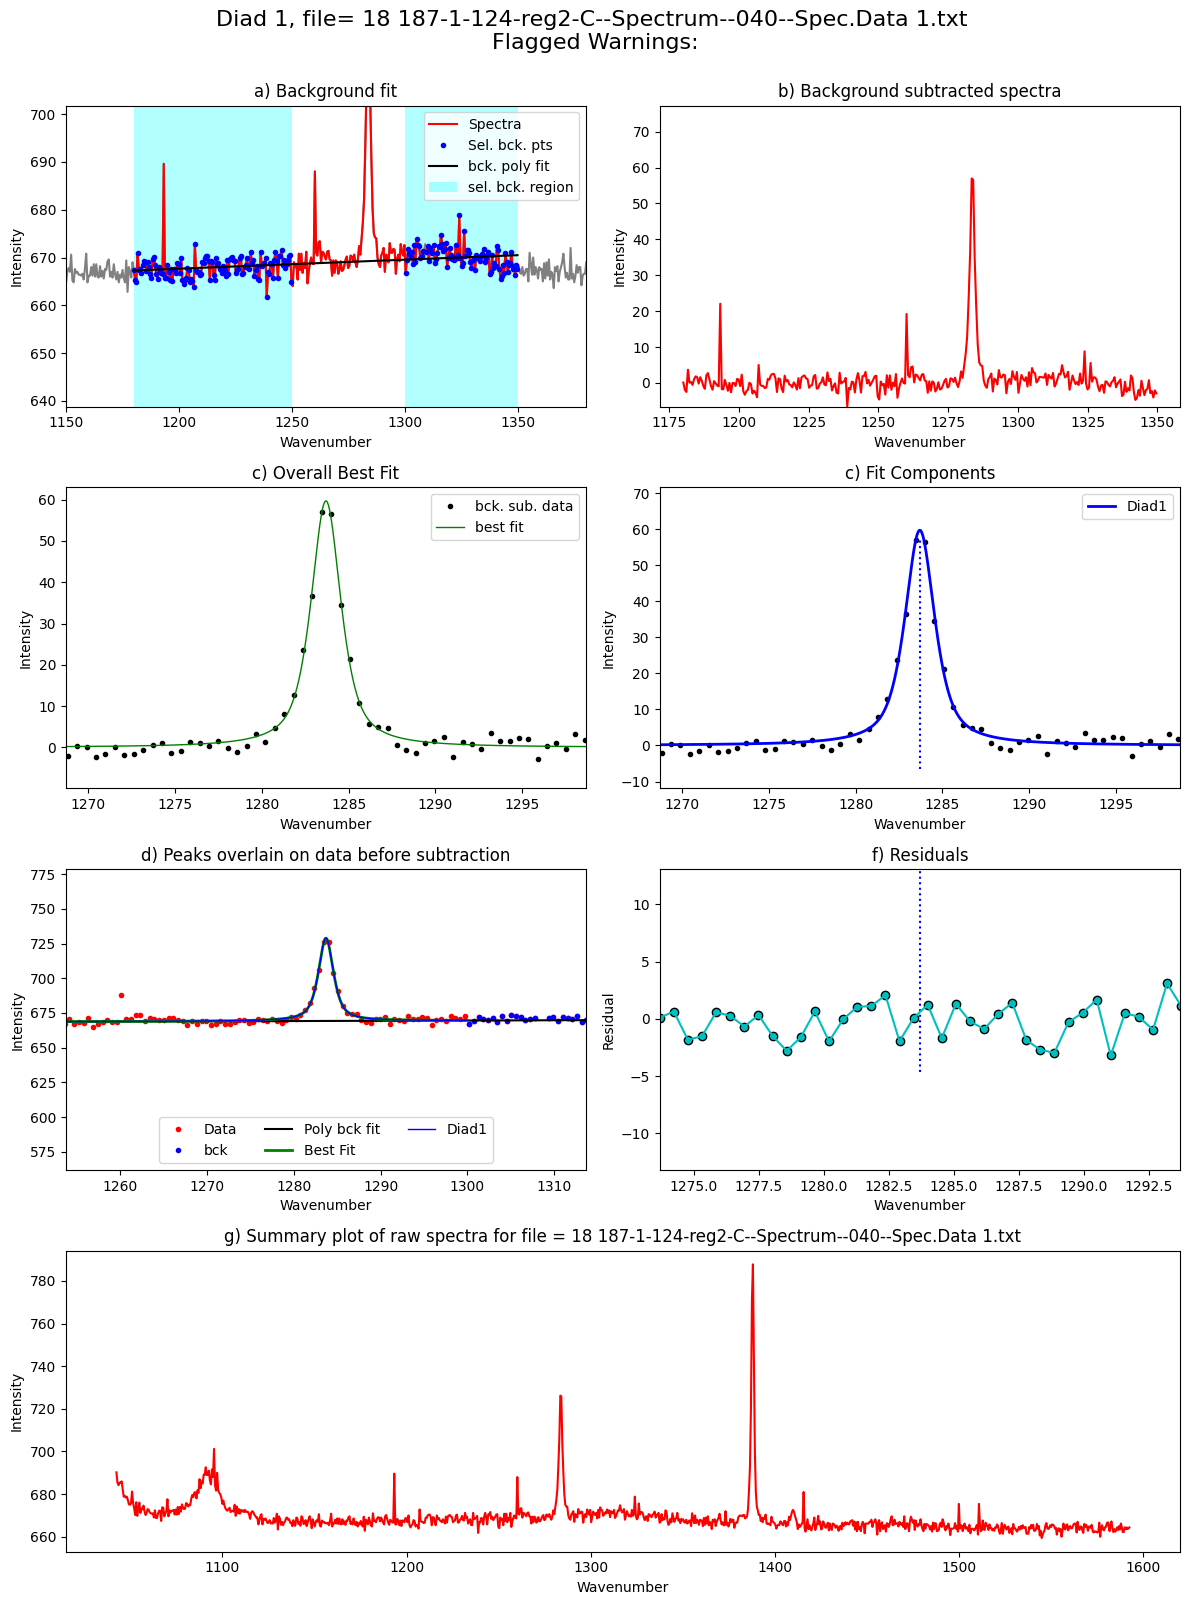

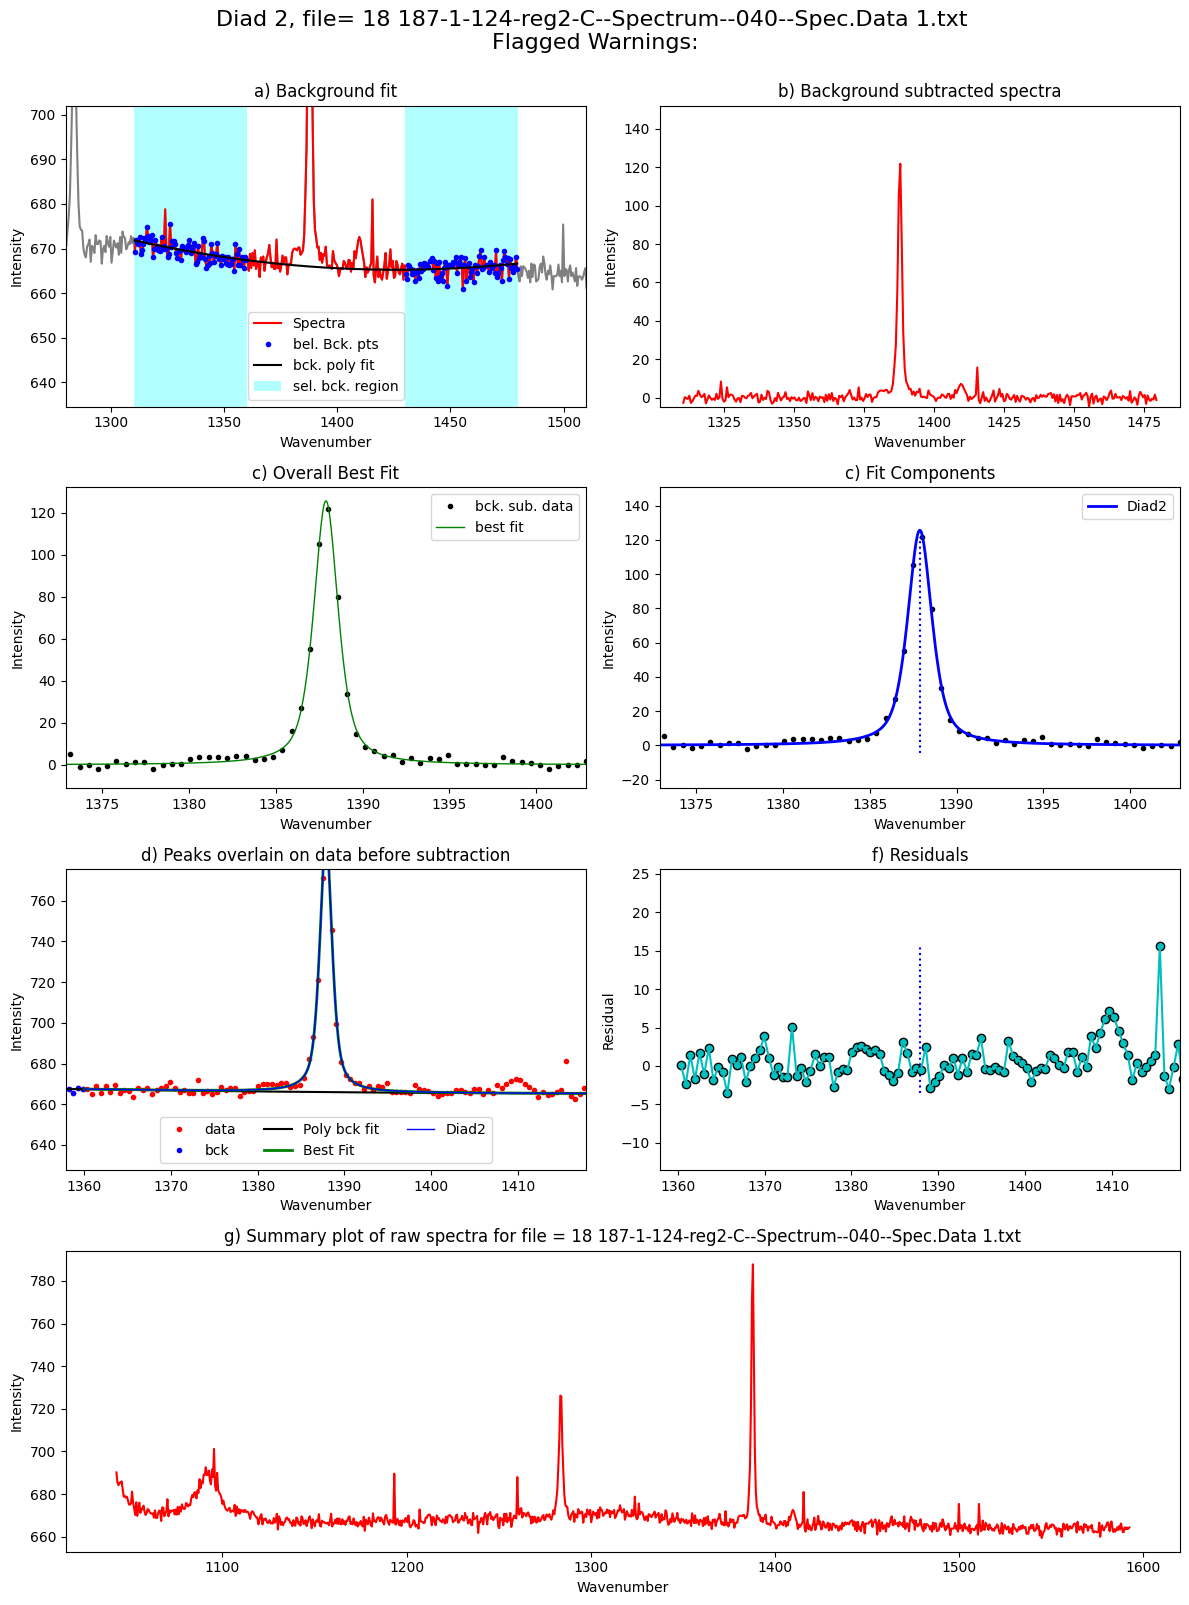

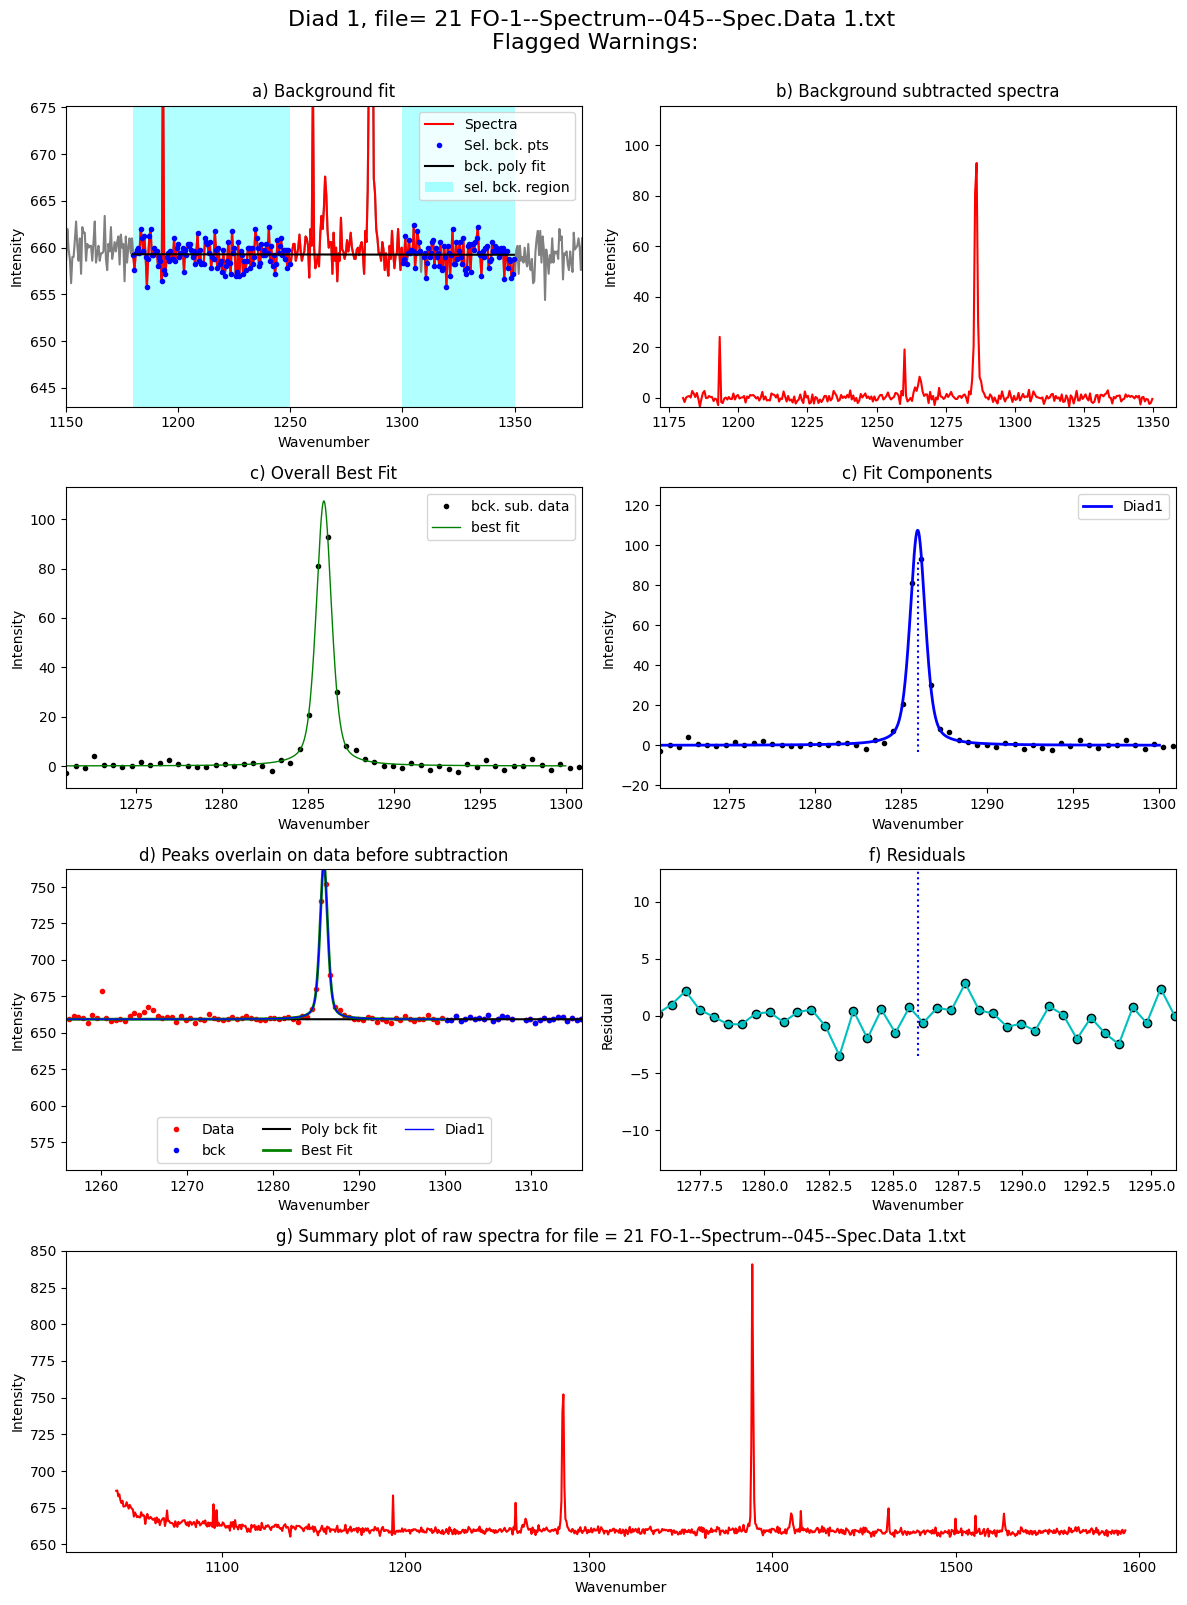

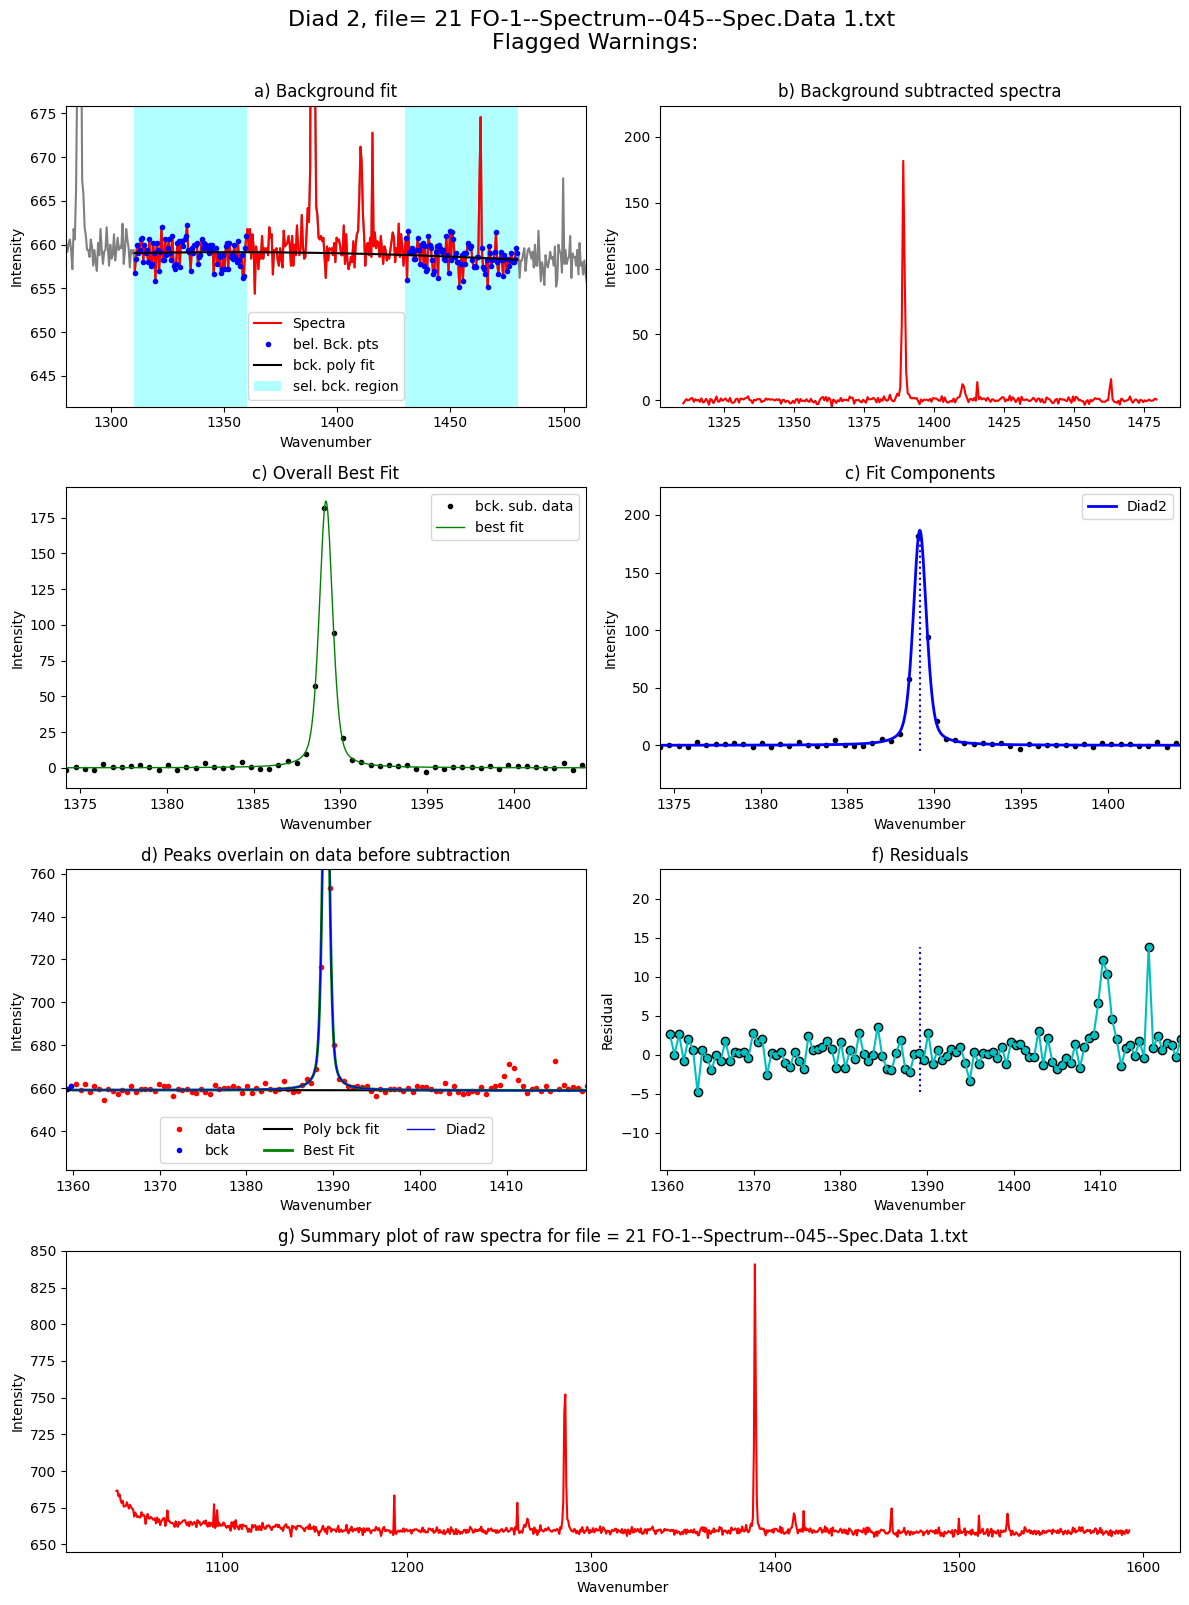

In [12]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [13]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [14]:
combo

filename   Splitting   Split_σ  \
0        187-1-124-reg1-A--Spectrum--013--Spec.Data 1  104.137476  0.018180   
1        187-1-124-reg1-B--Spectrum--015--Spec.Data 1  104.334436  0.003794   
2        187-1-124-reg1-C--Spectrum--019--Spec.Data 1  104.301896  0.012235   
3        187-1-124-reg1-D--Spectrum--021--Spec.Data 1  104.333466  0.005214   
4        187-1-124-reg1-E--Spectrum--025--Spec.Data 1  104.081664  0.018999   
5        187-1-124-reg1-E--Spectrum--026--Spec.Data 1  104.323450  0.012514   
6        187-1-124-reg1-F--Spectrum--028--Spec.Data 1  104.334992  0.004441   
7   187-1-124-reg1-G--Spectrum--030--Spec.Data 1_C...  104.300537  0.003485   
8        187-1-124-reg1-H--Spectrum--032--Spec.Data 1  104.353760  0.004278   
9   187-1-124-reg1-H--Spectrum--033--Spec.Data 1_C...  104.356811  0.004164   
10       187-1-124-reg2-A--Spectrum--036--Spec.Data 1  104.244798  0.013093   
11  187-1-124-reg2-B--Spectrum--038--Spec.Data 1_C...  104.164276  0.013945   
12       187-1-124-reg2-C--Spectrum--040--Spec.Data 1  104.188879  0.037068   
13                   FO-1--Spectrum--045--Spec.Data 1  103.229732  0.013524   

    Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0           1283.771649        0.017080             204.259176   
1           1283.390956        0.003340             640.518511   
2           1283.450215        0.011193             219.027160   
3           1283.389335        0.004905             649.786728   
4           1283.636313        0.018178             257.121560   
5           1283.404010        0.011453             208.085968   
6           1283.389914        0.003995             962.482772   
7           1283.455981        0.002999             879.667423   
8           1283.335547        0.003809             638.931452   
9           1283.341716        0.003690             682.914982   
10          1283.539342        0.011885             188.423321   
11          1283.736355        0.012813             211.390870   
12          1283.696340        0.035105              59.688769   
13          1285.946504        0.011669             107.405843   

    Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  \
0        1283.771649        630.007096           1.179249        2.458578   
1        1283.391006       1844.190957           1.062579        2.174737   
2        1283.450215        631.653012           1.022299        2.682760   
3        1283.389385       1900.996184           1.077959        3.068885   
4        1283.636313        671.365213           0.935128        4.973584   
5        1283.404010        603.066183           1.058135        2.388410   
6        1283.389964       2793.381059           1.084067        4.314615   
7        1283.456031       2554.765423           1.082872        3.030546   
8        1283.335597       1876.845600           1.075064        2.756158   
9        1283.341766       1982.278596           1.075658        2.433177   
10       1283.539342        538.157426           1.090377        2.472149   
11       1283.736355        620.586391           1.058765        3.067667   
12       1283.696340        175.046199           1.030082        1.638635   
13       1285.946504        145.881390           0.524144        1.480878   

    ...  Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  \
0   ...      1.083458      1.051118                  0.196834   
1   ...      1.050325      1.025316                  0.106948   
2   ...      1.086957      1.002304                  0.177791   
3   ...      1.056543      1.020157                  0.121902   
4   ...      2.697842      2.796791                  3.175398   
5   ...      1.038898      1.001148                  0.082318   
6   ...      1.017241      1.006711                  0.037382   
7   ...      1.052632      1.049312                  0.113986   
8   ...      1.080196      1.053653                  0.172433   
9   ...      1.031696      1.049769                  0.068187 

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [15]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()